## <center> **Exploratory Data Analysis** </center>
## <center> Restauarant Recommendation </center>
 

##### **Colour Code :** 
> * <font color = blue > **Blue** </font> - Main headings
> * <font color = green > **Green** </font> - Datasets
> * <font color = black > **Black** </font> - features
> * <font color = red > **Red** </font> - interpretation

### <font color = blue > Importing packages </font>

In [ ]:
import pandas as pd
import numpy as np

#plotting packages
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import folium

from google.colab import drive
from collections import Counter
import re

### <font color = blue > Reading dataset </font>

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
orders = pd.read_csv("/content/drive/MyDrive/Case Study 1/Dataset/orders.csv")
vendors = pd.read_csv("/content/drive/MyDrive/Case Study 1/Dataset/vendors.csv")

train_cust = pd.read_csv("/content/drive/MyDrive/Case Study 1/Dataset/train_customers.csv")
train_loc = pd.read_csv("/content/drive/MyDrive/Case Study 1/Dataset/train_locations.csv")

test_cust = pd.read_csv("/content/drive/MyDrive/Case Study 1/Dataset/test_customers.csv")
test_loc = pd.read_csv("/content/drive/MyDrive/Case Study 1/Dataset/test_locations.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.



### <font color = blue > Understanding the datasets </font>

#### <font color = green >train_customer </font>

In [ ]:
train_cust.head(2)

akeed_customer_id gender  ...           created_at           updated_at
0           TCHWPBT   Male  ...  2018-02-07 19:16:23  2018-02-07 19:16:23
1           ZGFSYCZ   Male  ...  2018-02-09 12:04:42  2018-02-09 12:04:41

[2 rows x 8 columns]

In [ ]:
print("Shape of the train customer dataset : " , train_cust.shape)

Shape of the train customer dataset :  (34674, 8)


In [ ]:
print("Null value present ? \n\n " , train_cust.isnull().sum())

Null value present ? 

  akeed_customer_id        0
gender               12154
dob                  31628
status                   0
verified                 0
language             13575
created_at               0
updated_at               0
dtype: int64


> Gender , dob and language have missing/null values

##### <font color = purple > Understanding each column/feature of the dataset </font>

##### **Akeed_customer_id**

In [ ]:
print("Number of unique customers : ", train_cust['akeed_customer_id'].nunique())

Number of unique customers :  34523


> The number of unique customers and the number of rows in the dataset does not match. This may imply that there are duplicates

In [ ]:
print("Number of  of duplicate rows(customers) : " , np.subtract(34674 , 34523) )
print("Percentage of duplicate rows(customers) : " , (np.subtract(34674 , 34523)/34674)*100 )

Number of  of duplicate rows(customers) :  151
Percentage of duplicate rows(customers) :  0.43548480129203443


In [ ]:
#getting the details of the duplicate customer ids

dup = train_cust[train_cust.duplicated(['akeed_customer_id'])]
dup

akeed_customer_id gender  ...           created_at           updated_at
23683           JY3XXPT   male  ...  2019-11-19 17:38:06  2019-11-19 17:38:06
23684           JY3XXPT   male  ...  2019-11-19 17:38:08  2019-11-19 17:38:08
23710           PB7GZR8   male  ...  2019-11-19 20:03:26  2019-11-19 20:03:26
23721           6DK062U   male  ...  2019-11-19 20:08:13  2019-11-19 20:08:13
23722           6DK062U   male  ...  2019-11-19 20:08:17  2019-11-19 20:08:17
...                 ...    ...  ...                  ...                  ...
24624           IM7ZTS8   male  ...  2019-11-30 23:07:38  2019-11-30 23:07:38
24625           IM7ZTS8   male  ...  2019-11-30 23:07:44  2019-11-30 23:07:44
24632           BS11M4N   male  ...  2019-11-30 23:52:00  2019-11-30 23:52:00
24633           BS11M4N   male  ...  2019-11-30 23:52:02  2019-11-30 23:52:02
24676           WS6ZLHE   male  ...  2019-12-01 20:49:29  2019-12-01 20:49:29

[151 rows x 8 columns]

Checking why duplicate customer details are present

In [ ]:
train_cust.loc[train_cust['akeed_customer_id'] == 'JY3XXPT' ]

akeed_customer_id gender  ...           created_at           updated_at
23682           JY3XXPT   male  ...  2019-11-19 17:38:04  2019-11-19 17:38:26
23683           JY3XXPT   male  ...  2019-11-19 17:38:06  2019-11-19 17:38:06
23684           JY3XXPT   male  ...  2019-11-19 17:38:08  2019-11-19 17:38:08

[3 rows x 8 columns]

In [ ]:
train_cust.loc[train_cust['akeed_customer_id'] == 'PB7GZR8' ]

akeed_customer_id  gender  ...           created_at           updated_at
23709           PB7GZR8  Female  ...  2019-11-19 20:03:23  2019-11-19 20:05:37
23710           PB7GZR8    male  ...  2019-11-19 20:03:26  2019-11-19 20:03:26

[2 rows x 8 columns]

In [ ]:
train_cust.loc[train_cust['akeed_customer_id'] == 'WS6ZLHE' ]

akeed_customer_id gender  ...           created_at           updated_at
24675           WS6ZLHE   male  ...  2019-12-01 20:49:28  2019-12-01 20:49:52
24676           WS6ZLHE   male  ...  2019-12-01 20:49:29  2019-12-01 20:49:29

[2 rows x 8 columns]

> 1. It can be seen that, duplicate entries of customers is due to the difference in verfied value of the customer <br>
> 2. From the discussion platform of the challenge, it is mentioned that the reason for duplicate entries is due to the verified column <br>
Link : https://zindi.africa/competitions/akeed-restaurant-recommendation-challenge/discussions/1356
>3. There are 151 duplicate rows





<font color = red > **Interpretation** </font>

> 1. Duplicate customer details are present due to the difference in verified value. Those rows can be removed from duplicate customer details were verified = 0
> 2. In the following anlsysis (EDA) , the duplicates are not removed as this percentage is very low 0.4%. The duplicate rows can be removed before feature engineering 

##### **Gender**

In [ ]:
gender = (train_cust.groupby(['gender'], dropna=False, as_index=False).size()).sort_values("size" , ascending = False)
gender.columns = ['gender' , 'frequency']
gender

gender  frequency
7         Male      17815
10         NaN      12154
9         male       2914
2       Female       1761
4     Female           13
8       Male            9
1        ?????          2
3      Female           2
5    Female             2
0                       1
6   Female              1

In [ ]:
#gender has missing values. Replacing float NaN with string NaN
gender.at[10, "gender"] = "Nan"

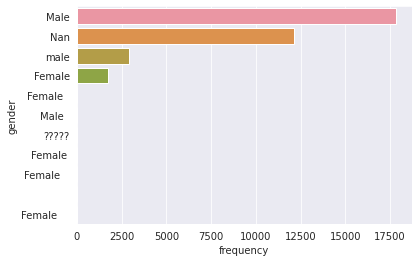

In [ ]:
#plotting the various gender vs its frequency
import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(x = "frequency" , y = "gender" , data = gender)

<font color = red > **Interpretation** </font>

> The main groups in gender are : Male, Female , Nan , ??????(1 datapoint). The gender column  needs to be cleaned . The unknown gender (Nan , ????? can be replaced by the mode  i.e by Male)

##### **DOB**

In [ ]:
dob = (train_cust.groupby(['dob'], dropna=False, as_index=False).size()).sort_values('size' , ascending = False)
dob.columns = ['dob' , 'frequency']
print(dob.head(36))
print(dob.tail(30))

       dob  frequency
65     NaN      31628
14  1970.0        255
43  1999.0        161
44  2000.0        158
42  1998.0        149
40  1996.0        140
37  1993.0        139
41  1997.0        131
38  1994.0        126
45  2001.0        123
39  1995.0        121
34  1990.0        120
33  1989.0        117
61  2019.0        116
35  1991.0        116
36  1992.0        101
32  1988.0         91
31  1987.0         81
29  1985.0         80
62  2020.0         69
30  1986.0         67
27  1983.0         51
28  1984.0         50
24  1980.0         48
46  2002.0         46
26  1982.0         39
47  2003.0         37
25  1981.0         36
48  2004.0         34
49  2005.0         31
23  1979.0         28
22  1978.0         23
21  1977.0         22
60  2018.0         20
20  1976.0         19
19  1975.0         16
       dob  frequency
16  1972.0         10
17  1973.0          9
18  1974.0          8
15  1971.0          8
12  1967.0          6
50  2006.0          6
10  1964.0          4
4   1900.0

In [ ]:
#replacing missing dob by 0000
dob.at[65 ,'dob', ]=0000

In [ ]:
dob_hist = pd.DataFrame({"dob" : train_cust['dob']})

In [ ]:
dob_hist['dob'] = dob_hist['dob'].fillna(0)
fig = px.histogram(dob_hist, x="dob",histnorm='percent')
fig.show()

> 1. 91% of the customers have not provided their dob. 
> 2. Among the 9% of customers who provided their dob, 
      * 6% (5.66%) of the customers were born in the year : (1980 - 1999)
      * 2% (1.69%) of the customers were born in the year : (2000 - 2019)  
      * 1% (1.18%) of the customers were born in the year : (1960-1979)
      * The remaining 1% of customers have given invalid year : 1 , 667 , 2531 , 2562

> 3. 2% of customers in the year (2000 - 2019) is further analysed

In [ ]:
dob_2000_2019 = dob.loc[(dob['dob']>=2000)&(dob['dob']<=2019)]

fig = px.histogram(dob_2000_2019, x="dob",histnorm='percent')
fig.show()

> 1. There are 28% (27.7%) of  customers born in the year : (2000 - 2009)
> 2. There are 17% (16.7%) of  customers born in the year : (2010 - 2014)
> 3. There are 28% (27.7%) of  customers born in the year : (2015 - 2019)

Point 1 and point 2 is logical, kids below 10 years generally don't have a phone or an account to order foods. Point 3 can be due to some error or corruption in the data

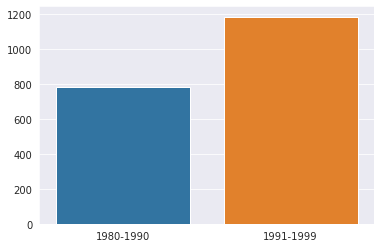

In [ ]:
#Analazing customers born in the year : 1980 - 1999

dob_1980_1990 = dob.loc[(dob['dob']>=1980)&(dob['dob']<=1990)]
dob_1991_1999 = dob.loc[(dob['dob']>=1991)&(dob['dob']<=1999)]

years = ["1980-1990" , "1991-1999"]
years_freq = [dob_1980_1990['frequency'].sum() , dob_1991_1999['frequency'].sum()]

sns.barplot(x = years , y = years_freq)

In [ ]:
dob_1980_1990

dob  frequency
34  1990.0        120
33  1989.0        117
32  1988.0         91
31  1987.0         81
29  1985.0         80
30  1986.0         67
27  1983.0         51
28  1984.0         50
24  1980.0         48
26  1982.0         39
25  1981.0         36

> Majority of the customers are born in the year 1980 - 1999. From the above plot it can be interpreted that Youngsters in their 20's makes up the majority of the customers

<font color = red > **Interpretation** </font>

> As 91% of customers have not provided their dob, this feature may not be useful in the prediction

##### **Status**

In [ ]:
status = train_cust.groupby(['status'], dropna=False, as_index=False).size()
status

status   size
0       0     35
1       1  34639

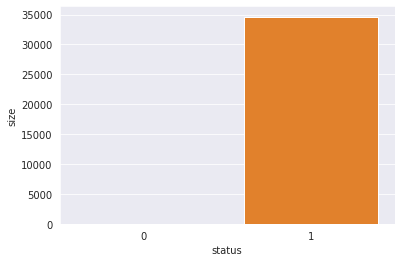

In [ ]:
sns.barplot(x = "status" , y = "size" , data = status)

<font color = red > **Interpretation** </font>

> Status of Majority of the customers are 1.

##### **Verified**

In [ ]:
verified = train_cust.groupby(['verified'], dropna=False, as_index=False).size()
verified

verified   size
0         0   1507
1         1  33167

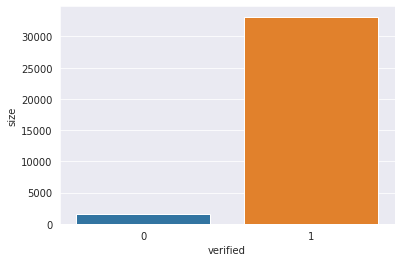

In [ ]:
sns.barplot(x = "verified" , y = "size" , data = verified)

> 1. 96% of the customers have verified their account and 4% of the customers have not verified their account
> 2. From the analysis of akeed_customer_id, we know that there are 151 duplicates : details of customers when their account was verified and not verified. Hence from the 1507 non verified customers, only 1356 customers have not verified their account

<font color = red > **Interpretation** </font>

> More than 95% of the customers have verified their account

##### **Status and Verified**

In [ ]:
status_verified = (train_cust.groupby([ 'status' , 'verified'], dropna=False, as_index=False).size()).sort_values("size" , ascending = False)
status_verified.columns = ['status' , 'verified' , 'frequency']
status_verified

status  verified  frequency
3       1         1      33140
2       1         0       1499
1       0         1         27
0       0         0          8

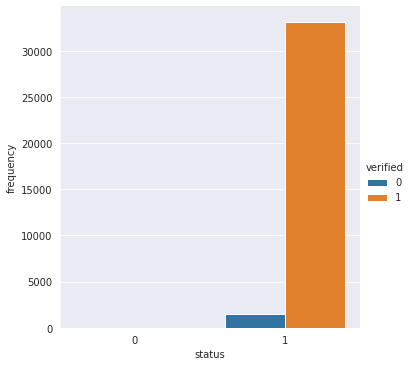

In [ ]:
sns.catplot(x='status', y='frequency', hue='verified', data=status_verified, kind='bar')

<font color = red > **Interpretation** </font>

> Status of a customer may imply if a customer is a active customer or not. Few customers may create an account but not use the app. Why? <br>
There are 27 customers who have their account verified but their status is 0. This maybe because of the above mentioned reason

##### **Language**

In [ ]:
language = (train_cust.groupby(['language'], dropna=False, as_index=False).size()).sort_values("size" , ascending = False)
language.columns = ['language' , 'frequency']

#replacing missing values by NaN
language.at[1 , "language"] = "NaN"

language

language  frequency
0       EN      21099
1      NaN      13575

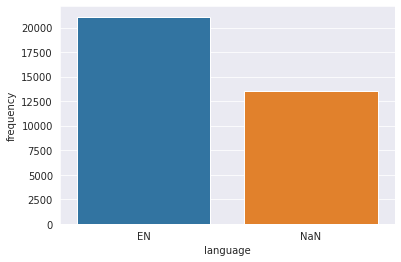

In [ ]:
sns.barplot(x = "language" , y = "frequency" , data = language)

In [ ]:
print("Percentage of  customers whose langauge is English : " , np.round(21099/(21099 + 13575)*100,2) )
print("Percentage of  customers whose langauge is NaN : " , np.round(13575/(21099 + 13575)*100,2) )

Percentage of  customers whose langauge is English :  60.85
Percentage of  customers whose langauge is NaN :  39.15


<font color = red > **Interpretation** </font>

> English is the langauge all the customers communicate in (among all the customers whose language is known). 61% of the customers speak in English. 39% of customers language is unknown

##### **Created_at**

In [ ]:
created_at = list(train_cust['created_at'])

#getting the date
created_at_date = [i.split(" ")[0] for i in created_at]
#getting the time
created_at_time = [i.split(" ")[1] for i in created_at]
#getting the year in which the customers created at account
created_at_date_year = [int(i.split("-")[0]) for i in created_at_date]

#getting the count of customers for all the possible years
created_at_date_year_dict = Counter(created_at_date_year)
#getting the unique years
year = list(created_at_date_year_dict.keys())
#getting the frequency of customers for the obtained years
freq = list(created_at_date_year_dict.values())

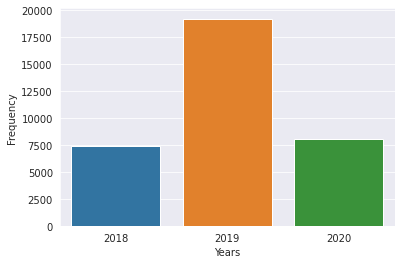

In [ ]:
sns.barplot(x = year , y = freq)
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency of customers')

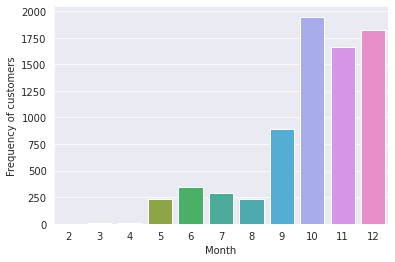

In [ ]:
#analyzing each year

#2018

#getting the time and date for the year 2018
created_at_date_2018 = [i.split(" ")[0] for i in created_at if i.startswith("2018")]
created_at_time_2018 = [i.split(" ")[1] for i in created_at if i.startswith("2018")]

#getting the months 
created_at_date_2018_month = [int(i.split("-")[1]) for i in created_at_date_2018]
created_at_date_2018_month_dict = Counter(created_at_date_2018_month)

#getting the months and frequency of customers per month
month_2018 = list(created_at_date_2018_month_dict.keys())
month_freq_2018 = list(created_at_date_2018_month_dict.values())

sns.barplot(x = month_2018 , y = month_freq_2018)
plt.xlabel("Month")
plt.ylabel("Frequency of customers")


Text(0, 0.5, 'Frequency of customers')

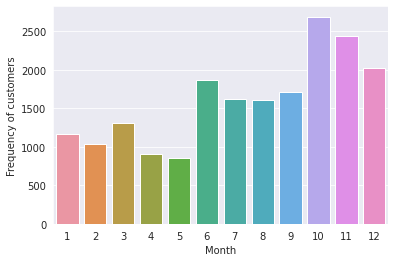

In [ ]:
#2019

#getting the time and date for the year 2019
created_at_date_2019 = [i.split(" ")[0] for i in created_at if i.startswith("2019")]
created_at_time_2019 = [i.split(" ")[1] for i in created_at if i.startswith("2019")]

#getting the months 
created_at_date_2019_month = [int(i.split("-")[1]) for i in created_at_date_2019]
created_at_date_2019_month_dict = Counter(created_at_date_2019_month)

#getting the months and frequency of customers per month
month_2019 = list(created_at_date_2019_month_dict.keys())
month_freq_2019 = list(created_at_date_2019_month_dict.values())

sns.barplot(x = month_2019 , y = month_freq_2019)
plt.xlabel("Month")
plt.ylabel("Frequency of customers")

Text(0, 0.5, 'Frequency of customers')

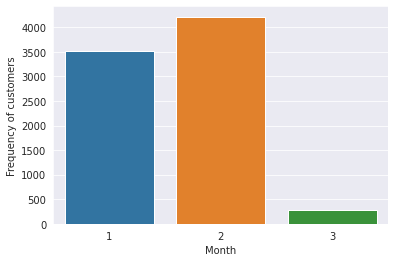

In [ ]:
#2020

#getting the time and date for the year 2020
created_at_date_2020 = [i.split(" ")[0] for i in created_at if i.startswith("2020")]
created_at_time_2020 = [i.split(" ")[1] for i in created_at if i.startswith("2020")]

#getting the months
created_at_date_2020_month = [int(i.split("-")[1]) for i in created_at_date_2020]
created_at_date_2020_month_dict = Counter(created_at_date_2020_month)

#getting the months and frequency of customers per month
month_2020 = list(created_at_date_2020_month_dict.keys())
month_freq_2020 = list(created_at_date_2020_month_dict.values())

sns.barplot(x = month_2020 , y = month_freq_2020)
plt.xlabel("Month")
plt.ylabel("Frequency of customers")

<font color = red > **Interpretation** </font>

>1. The high frequency in the year of 2020 can be because the complete data of 2019 is available. For 2018, only from the month of May is available and for 2020 on Januray, Februray and March data is available
>2. The months from October - December has an increase in new customers. This may be due to the multiple holidays and long breaks during this month (for schools). 
Link : https://www.edarabia.com/school-holidays-muscat/


##### **Updated_at**

In [ ]:
updated_at = list(train_cust['updated_at'])
updated_at_date = [i.split(" ")[0] for i in updated_at]
updated_at_time = [i.split(" ")[1] for i in updated_at]

In [ ]:
updated_at_date_year = [int(i.split("-")[0]) for i in updated_at_date]

updated_at_date_year_dict = Counter(updated_at_date_year)
year_update = list(updated_at_date_year_dict.keys())
freq_update = list(updated_at_date_year_dict.values())

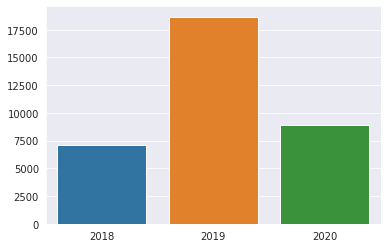

In [ ]:
sns.barplot(x = year_update , y = freq_update)

<font color = red > **Interpretation** </font>

>1. updated_at has a very similar distribution as created_at, with a lower frequency. 

#### <font color = green >train_location </font>

In [ ]:
train_loc.head(2)

customer_id  location_number location_type  latitude  longitude
0     02SFNJH                0           NaN  1.682392 -78.789737
1     02SFNJH                1           NaN  1.679137   0.766823

In [ ]:
print("Shape of the train location dataset : " , train_loc.shape)

Shape of the train location dataset :  (59503, 5)


In [ ]:
print("Null value present ? \n\n " , train_loc.isnull().sum())

Null value present ? 

  customer_id            0
location_number        0
location_type      27209
latitude               6
longitude              6
dtype: int64


> location_type , latitude and longitude have missing/null values

##### <font color = purple > Understanding each column/feature of the dataset </font>

##### **customer_id**

In [ ]:
print("Number of unique customers : ", train_loc['customer_id'].nunique())

Number of unique customers :  35400


> The difference in number of unique customers and the number of rows is because a customer can have more than one location_number


In [ ]:
cust_id = train_loc.groupby(['customer_id'], dropna=False, as_index=False).size()
cust_id.columns = ["customer_id" , "number_of_locations"]

print("Shape of the dataset after grouping the data based on customer_id : " , cust_id.shape[0])
print("\n\n" , cust_id)

Shape of the dataset after grouping the data based on customer_id :  35400


       customer_id  number_of_locations
0         000THBA                    1
1         001XN9X                    1
2         001ZNTK                    1
3         002510Y                    1
4         005ECL6                    1
...           ...                  ...
35395     ZZVGIVK                    2
35396     ZZVLIB5                    3
35397     ZZWKMGG                    1
35398     ZZY3N0D                    2
35399     ZZYY4EX                    1

[35400 rows x 2 columns]


> 1.  After grouping by customer_id, the number of customer_id matches with the number of rows
> 2. The location of 35400 customers are given, but the basic information (train_customer) of only 34523 customers are given. The basic information of 877 customers are not given. Will check if these 877 customers have made an order or not.

In [ ]:
#getting the customer id of the 877 customers

#getting all the customers id from train customer dataset
train_cust_id = list(train_cust['akeed_customer_id'])

#getting all the customers id from train location dataset
train_loc_id = list(train_loc['customer_id'])

#getting the customer id of the 877 customers present in train location dataset and not present in train customer dataset
id_877 = set(train_loc_id) - set(train_cust_id)

#getting all the customer ids who made an order from the orders dataset
order_id = set(list(orders['customer_id']))

In [ ]:
#checking if the 877 customers have made an order or not

#made an order
id_877_in_order_id = order_id.intersection(id_877)
#has not made an order
id_877_not_in_order_id = id_877 - id_877_in_order_id

print("Number of customers not in train_customer but have made orders (details available in orders) : " , len(id_877_in_order_id))
print("Number of customers not in train_customer and not in orders : " , len(id_877_not_in_order_id ))
print("-"*100)
print("Percentage the 211 customers contributes to the train_location dataset of customers : " , np.round(211/35400*100,2),"%")

Number of customers not in train_customer but have made orders (details available in orders) :  666
Number of customers not in train_customer and not in orders :  211
----------------------------------------------------------------------------------------------------
Percentage the 211 customers contributes to the train_location dataset of customers :  0.6 %


<font color = red > **Interpretation** </font>

>1. The difference in the number of rows and unique customers is because a customer can have more than one location
> 2. There are 877 customers, whose details are not present in train customer dataset. Out of these 877 customers
     * 666 customers have made an order(s) [data is available in orders dataset]
     * Only the location detials of 211 customers are known (< 1% of the dataset)


##### **location_number**

In [ ]:
loc_num = train_loc.groupby(['location_number'], dropna=False, as_index=False).size()
loc_num.columns = ["location_number" , "number_of_customers"]
loc_num

location_number  number_of_customers
0                 0                35400
1                 1                13798
2                 2                 5488
3                 3                 2519
4                 4                 1153
5                 5                  504
6                 6                  246
7                 7                  128
8                 8                   76
9                 9                   52
10               10                   34
11               11                   21
12               12                   15
13               13                   13
14               14                   13
15               15                    8
16               16                    6
17               17                    5
18               18                    5
19               19                    3
20               20                    2
21               21                    2
22               22                    2
23               23                    2
24               24                    2
25               25                    2
26               26                    1
27               27                    1
28               28                    1
29               29                    1

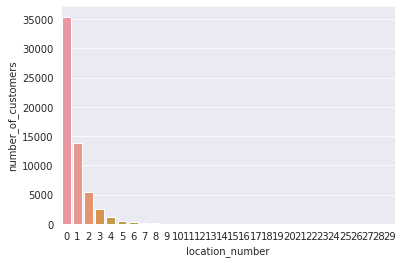

In [ ]:
sns.barplot(x = "location_number" , y = "number_of_customers"  , data = loc_num)  

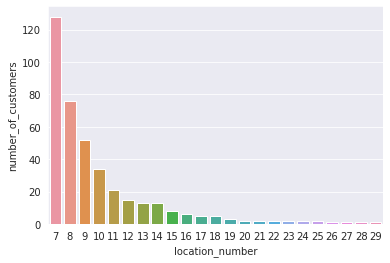

In [ ]:
#zooming into the location numbers
sns.barplot(x = "location_number" , y = "number_of_customers"  , data = loc_num[7:])  

> 1. There are 30 unique location numbers ( 0 - 29)
> 2. Majority of the customers belong to location number 0
> 3. As the location number increases, number of customers decreases

In [ ]:
#getting the percenatge of the customers in each location number
loc_num['percentage_of_customers'] = (loc_num['number_of_customers']/loc_num['number_of_customers'].sum())*100
loc_num.head(3)

location_number  number_of_customers  percentage_of_customers
0                0                35400                59.492799
1                1                13798                23.188747
2                2                 5488                 9.223064

In [ ]:
#displaying a pie graph indicating the percenatge of customers in each location number

fig1 = px.pie(values=loc_num['percentage_of_customers'], names=loc_num['location_number'])
fig1.show()

print("Percentage of customers belonging to location number n : \n " )
loc_num

Percentage of customers belonging to location number n : 
 


location_number  number_of_customers  percentage_of_customers
0                 0                35400                59.492799
1                 1                13798                23.188747
2                 2                 5488                 9.223064
3                 3                 2519                 4.233400
4                 4                 1153                 1.937717
5                 5                  504                 0.847016
6                 6                  246                 0.413425
7                 7                  128                 0.215115
8                 8                   76                 0.127725
9                 9                   52                 0.087391
10               10                   34                 0.057140
11               11                   21                 0.035292
12               12                   15                 0.025209
13               13                   13                 0.021848
14               14                   13                 0.021848
15               15                    8                 0.013445
16               16                    6                 0.010084
17               17                    5                 0.008403
18               18                    5                 0.008403
19               19                    3                 0.005042
20               20                    2                 0.003361
21               21                    2                 0.003361
22               22                    2                 0.003361
23               23                    2                 0.003361
24               24                    2                 0.003361
25               25                    2                 0.003361
26               26                    1                 0.001681
27               27                    1                 0.001681
28               28                    1                 0.001681
29               29                    1                 0.001681

> Around 60% of the customers have atleast one of their location at location number 0

In [ ]:
#Analaysing the number of location number a customer belongs to

number_of_loc = cust_id.groupby(['number_of_locations'], dropna=False, as_index=False).size()
number_of_loc.columns = ["number_of_locations" , "number_of_customers"]
number_of_loc

number_of_locations  number_of_customers
0                     1                21602
1                     2                 8310
2                     3                 2969
3                     4                 1366
4                     5                  649
5                     6                  258
6                     7                  118
7                     8                   52
8                     9                   24
9                    10                   18
10                   11                   13
11                   12                    6
12                   13                    2
13                   15                    5
14                   16                    2
15                   17                    1
16                   19                    2
17                   20                    1
18                   26                    1
19                   30                    1

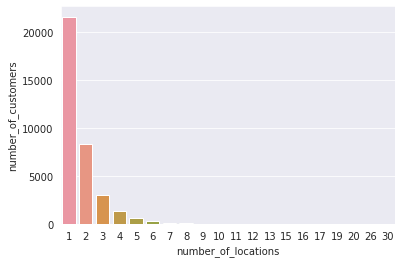

In [ ]:
sns.barplot(x = "number_of_locations" , y = "number_of_customers"  , data = number_of_loc)  

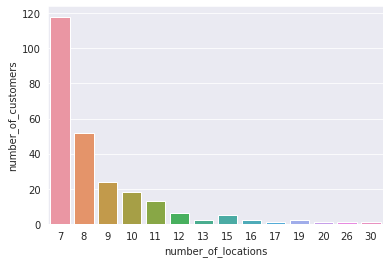

In [ ]:
#zooming into the above plot
sns.barplot(x = "number_of_locations" , y = "number_of_customers"  , data = number_of_loc.loc[6:])  

> 1. Majority of the customers have only 1 location (belongs to only 1 location number). 
> 2. Few customers have 5 to 7 locations and very few customers have more than  locations

In [ ]:
#displaying a pie graph indicating the how many locations a customer has

number_of_loc["percenatge_of_customers_having_n_location_numbers"] = (number_of_loc['number_of_customers']/number_of_loc['number_of_customers'].sum())*100

fig = px.pie(values=number_of_loc["percenatge_of_customers_having_n_location_numbers"], names=number_of_loc['number_of_locations'])
fig.show()

print("Percentage of customers having n location numbers : \n " )
number_of_loc


Percentage of customers having n location numbers : 
 


number_of_locations  ...  percenatge_of_customers_having_n_location_numbers
0                     1  ...                                          61.022599
1                     2  ...                                          23.474576
2                     3  ...                                           8.387006
3                     4  ...                                           3.858757
4                     5  ...                                           1.833333
5                     6  ...                                           0.728814
6                     7  ...                                           0.333333
7                     8  ...                                           0.146893
8                     9  ...                                           0.067797
9                    10  ...                                           0.050847
10                   11  ...                                           0.036723
11                   12  ...                                           0.016949
12                   13  ...                                           0.005650
13                   15  ...                                           0.014124
14                   16  ...                                           0.005650
15                   17  ...                                           0.002825
16                   19  ...                                           0.005650
17                   20  ...                                           0.002825
18                   26  ...                                           0.002825
19                   30  ...                                           0.002825

[20 rows x 3 columns]

<font color = red > **Interpretation** </font>

>1. 61% of the customers have only one location_type. Number of customers decreases as the number of locations a customer has increases
> 2. 59% of the customers belong to location number 0. As the location number increases the number of customers belonging to that location number decreases


##### **location_type**

In [ ]:
location_type = (train_loc.groupby(['location_type'], dropna=False, as_index=False).size()).sort_values("size" , ascending = False)
location_type.columns = ['location_type' , 'frequency']
location_type.at[3, 'location_type'] = "NaN"
location_type

location_type  frequency
3           NaN      27209
0          Home      19703
2          Work       6441
1         Other       6150

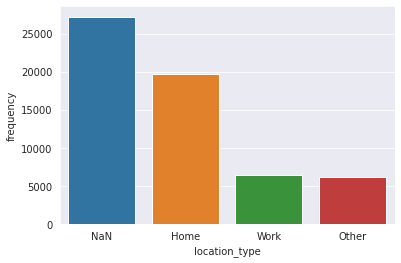

In [ ]:
sns.barplot(x = "location_type" , y = "frequency"  , data = location_type)  

> Majority of the customers 46% (45.75%)  have not provided the type of their location. This is followed by Home : 33.11% of customers have provided their location_type, followed by work and other

In [ ]:
#getting the location type based on location number
location_numb_type = train_loc.groupby(['location_number' , 'location_type'], dropna=False, as_index=False).size()
location_numb_type

location_number location_type   size
0                 0          Home  12288
1                 0         Other   3922
2                 0          Work   3952
3                 0           NaN  15238
4                 1          Home   4229
..              ...           ...    ...
83               25           NaN      1
84               26          Home      1
85               27          Home      1
86               28          Home      1
87               29          Home      1

[88 rows x 3 columns]

location_number location_type  frequency
3                0           NaN      15238
0                0          Home      12288
2                0          Work       3952
1                0         Other       3922

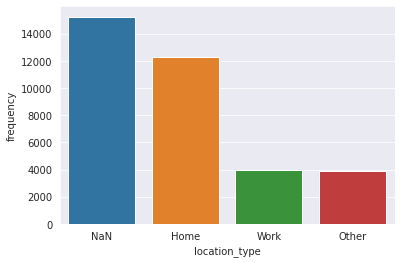

In [ ]:
#location_number = 0
loc_numb_0 = (location_numb_type.loc[location_numb_type['location_number'] == 0]).sort_values("size" , ascending = False)
loc_numb_0.columns = ['location_number' , 'location_type' , 'frequency']
loc_numb_0.at[3,"location_type"] = "NaN"

sns.barplot(x = "location_type" , y = "frequency"  , data = loc_numb_0)  

loc_numb_0

location_number location_type  frequency
7                1           NaN       6876
4                1          Home       4229
6                1          Work       1379
5                1         Other       1314

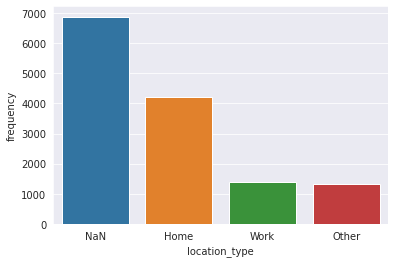

In [ ]:
#location_number = 1
loc_numb_1 = (location_numb_type.loc[location_numb_type['location_number'] == 1]).sort_values("size" , ascending = False)
loc_numb_1.columns = ['location_number' , 'location_type' , 'frequency']
loc_numb_1.at[7,"location_type"] = "NaN"


sns.barplot(x = "location_type" , y = "frequency"  , data = loc_numb_1)  

loc_numb_1

location_number location_type  frequency
11                2           NaN       2855
8                 2          Home       1617
10                2          Work        553
9                 2         Other        463

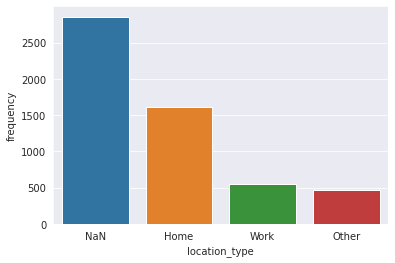

In [ ]:
#location_number = 2
loc_numb_2 = (location_numb_type.loc[location_numb_type['location_number'] == 2]).sort_values("size" , ascending = False)
loc_numb_2.columns = ['location_number' , 'location_type' , 'frequency']
loc_numb_2.at[11,"location_type"] = "NaN"


sns.barplot(x = "location_type" , y = "frequency"  , data = loc_numb_2)  

loc_numb_2

> In location number 0,1 and 2 are similar pattern in location type is observed. Let's see if a similar pattern is seen across all the location numbers

In [ ]:
#understanding the trend of Home, Work and Others in all the location numbers

loc_numb_type_home = location_numb_type.loc[location_numb_type['location_type'] == "Home"]
loc_numb_type_work = location_numb_type.loc[location_numb_type['location_type'] == "Work"]
loc_numb_type_other = location_numb_type.loc[location_numb_type['location_type'] == "Other"]

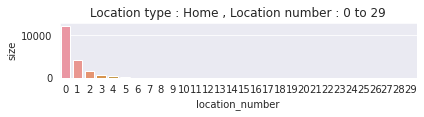

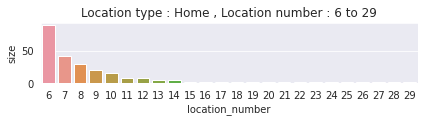

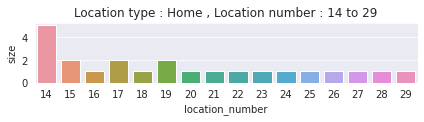

In [ ]:
#Location type : Home

plt.subplot(3,1,1)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_home)  
plt.title("Location type : Home , Location number : 0 to 29")
plt.tight_layout()
plt.show()

plt.subplot(3,1,2)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_home[6:])  
plt.title("Location type : Home , Location number : 6 to 29")
plt.tight_layout()
plt.show()

plt.subplot(3,1,3)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_home[14:])  
plt.title("Location type : Home , Location number : 14 to 29")
plt.tight_layout()
plt.show()

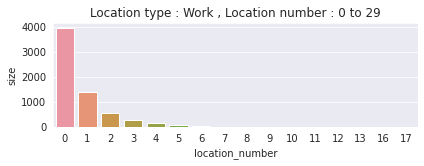

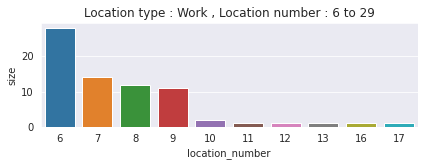

In [ ]:
#Location type : Work

plt.subplot(2,1,1)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_work)  
plt.title("Location type : Work , Location number : 0 to 29")
plt.tight_layout()
plt.show()

plt.subplot(2,1,2)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_work[6:])  
plt.title("Location type : Work , Location number : 6 to 29")
plt.tight_layout()
plt.show()

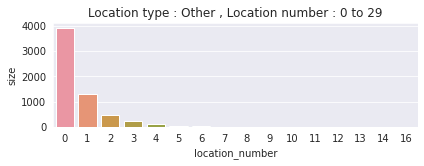

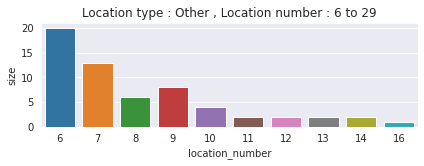

In [ ]:
#Location type : Other

plt.subplot(2,1,1)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_other)  
plt.title("Location type : Other , Location number : 0 to 29")
plt.tight_layout()
plt.show()

plt.subplot(2,1,2)
sns.barplot(x = "location_number" , y = "size"  , data = loc_numb_type_other[6:])  
plt.title("Location type : Other , Location number : 6 to 29")
plt.tight_layout()
plt.show()

<font color = red > **Interpretation** </font>

> 1. A similar trend in location type is found in all location numbers
> 2. As the location number increases there is a decrease in the number of customers
> 3. Location type : Home dominates the location type work and other in all location number. This is identified by the y axis range
> 4. Location type Home is present in all location numbers whereas location type work is present in location numbers 0 to 17 and others present in location number 0 to 16



##### **latitude,longitude**

In [ ]:
cust_loc_numb = list(train_loc["location_number"])
cust_lat = list(train_loc["latitude"])
cust_long = list(train_loc["longitude"])

In [ ]:
#getting the location number of the missing latitude and longitude
lat_long_cust = train_loc.groupby(['latitude' , "longitude" , "location_number"], dropna=False, as_index=False).size()
lat_long_cust_nan = lat_long_cust[lat_long_cust['latitude'].isna()]
lat_long_cust_nan

latitude  longitude  location_number  size
59068       NaN        NaN                0     3
59069       NaN        NaN                2     3

> The 6 missing latitude and longitude values belong to location number 0 and 2 with 3 location in each location number

In [ ]:
#getting the latitude and longitude of customers based on location number

lat_lon_0 = train_loc[train_loc["location_number"] == 0 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_1 = train_loc[train_loc["location_number"] == 1 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_2 = train_loc[train_loc["location_number"] == 2 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_3 = train_loc[train_loc["location_number"] == 3 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_4 = train_loc[train_loc["location_number"] == 4 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_5 = train_loc[train_loc["location_number"] == 5 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_6 = train_loc[train_loc["location_number"] == 6 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_7 = train_loc[train_loc["location_number"] == 7 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_8 = train_loc[train_loc["location_number"] == 8 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_9 = train_loc[train_loc["location_number"] == 9 ][['location_number' ,'latitude' , 'longitude']]

lat_lon_10 = train_loc[train_loc["location_number"] == 10 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_11 = train_loc[train_loc["location_number"] == 11 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_12 = train_loc[train_loc["location_number"] == 12 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_13 = train_loc[train_loc["location_number"] == 13 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_14 = train_loc[train_loc["location_number"] == 14 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_15 = train_loc[train_loc["location_number"] == 15 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_16 = train_loc[train_loc["location_number"] == 16 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_17 = train_loc[train_loc["location_number"] == 17 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_18 = train_loc[train_loc["location_number"] == 18 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_19 = train_loc[train_loc["location_number"] == 19 ][['location_number' ,'latitude' , 'longitude']]

lat_lon_20 = train_loc[train_loc["location_number"] == 20 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_21 = train_loc[train_loc["location_number"] == 21 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_22 = train_loc[train_loc["location_number"] == 22 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_23 = train_loc[train_loc["location_number"] == 23 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_24 = train_loc[train_loc["location_number"] == 24 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_25 = train_loc[train_loc["location_number"] == 25 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_26 = train_loc[train_loc["location_number"] == 26 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_27 = train_loc[train_loc["location_number"] == 27 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_28 = train_loc[train_loc["location_number"] == 28 ][['location_number' ,'latitude' , 'longitude']]
lat_lon_29 = train_loc[train_loc["location_number"] == 29 ][['location_number' ,'latitude' , 'longitude']]


#reseting the index value of the above obtained dataframes
lat_lon_0 = lat_lon_0.reset_index(drop=True)
lat_lon_1 = lat_lon_1.reset_index(drop=True)
lat_lon_2 = lat_lon_2.reset_index(drop=True)
lat_lon_3 = lat_lon_3.reset_index(drop=True)
lat_lon_4 = lat_lon_4.reset_index(drop=True)
lat_lon_5 = lat_lon_5.reset_index(drop=True)
lat_lon_6 = lat_lon_6.reset_index(drop=True)
lat_lon_7 = lat_lon_7.reset_index(drop=True)
lat_lon_8 = lat_lon_8.reset_index(drop=True)
lat_lon_9 = lat_lon_9.reset_index(drop=True)


lat_lon_10 = lat_lon_10.reset_index(drop=True)
lat_lon_11 = lat_lon_11.reset_index(drop=True)
lat_lon_12 = lat_lon_12.reset_index(drop=True)
lat_lon_13 = lat_lon_13.reset_index(drop=True)
lat_lon_14 = lat_lon_14.reset_index(drop=True)
lat_lon_15 = lat_lon_15.reset_index(drop=True)
lat_lon_16 = lat_lon_16.reset_index(drop=True)
lat_lon_17 = lat_lon_17.reset_index(drop=True)
lat_lon_18 = lat_lon_18.reset_index(drop=True)
lat_lon_19 = lat_lon_19.reset_index(drop=True)


lat_lon_20 = lat_lon_20.reset_index(drop=True)
lat_lon_21 = lat_lon_21.reset_index(drop=True)
lat_lon_22 = lat_lon_22.reset_index(drop=True)
lat_lon_23 = lat_lon_23.reset_index(drop=True)
lat_lon_24 = lat_lon_24.reset_index(drop=True)
lat_lon_25 = lat_lon_25.reset_index(drop=True)
lat_lon_26 = lat_lon_26.reset_index(drop=True)
lat_lon_27 = lat_lon_27.reset_index(drop=True)
lat_lon_28 = lat_lon_28.reset_index(drop=True)
lat_lon_29 = lat_lon_29.reset_index(drop=True)


In [ ]:
#Plotting a subset of latitude and longitude belonging to location number 0 ,1,2 and 3
#location number 0 : Blue marker
#location number 1 : Green marker
#location number 2 : Black marker
#location number 3 : Red marker

#Why only 4 location numbers are plotted?
#To get an idea on how the (latitude,longitude) are spread based on location numberd
#location numbers having highest (latitude,longitude) are plotted



m1 = folium.Map(location=[23.614328, 58.545284])

#location number 0 : Blue marker
for i in range (1000):
    ln_0 = lat_lon_0['location_number'][i]
    lat_0= lat_lon_0['latitude'][i]
    lon_0=lat_lon_0['longitude'][i]
    folium.Marker(location = [lat_0, lon_0], popup= str(ln_0) + ": "+str(id), tooltip= str(ln_0) + ": "+str(id) ,  icon=folium.Icon(color="blue")).add_to(m1)

#location number 1 : Green marker
for i in range (500):
    ln_1 = lat_lon_1['location_number'][i]
    lat_1= lat_lon_1['latitude'][i]
    lon_1=lat_lon_1['longitude'][i]
    folium.Marker(location = [lat_1, lon_1], popup= str(ln_1) + ": "+str(id), tooltip= str(ln_1) + ": "+str(id) ,  icon=folium.Icon(color="green")).add_to(m1)

#location number 2 : Black marker
for i in range (100):
    ln_3 = lat_lon_3['location_number'][i]
    lat_3= lat_lon_3['latitude'][i]
    lon_3=lat_lon_3['longitude'][i]
    folium.Marker(location = [lat_3, lon_3], popup= str(ln_3) + ": "+str(id), tooltip= str(ln_3) + ": "+str(id) ,  icon=folium.Icon(color="black")).add_to(m1)

#location number 3 : Red marker
for i in range (50):
    ln_4 = lat_lon_4['location_number'][i]
    lat_4= lat_lon_4['latitude'][i]
    lon_4=lat_lon_4['longitude'][i]
    folium.Marker(location = [lat_4, lon_4], popup= str(ln_4) + ": "+str(id), tooltip= str(ln_4) + ": "+str(id) ,  icon=folium.Icon(color="red")).add_to(m1)

m1

<font color = red > **Interpretation** </font>

> 1. The (latitude,longitude) are masked. Hence the points dont lie in the Oman region
> 2. There is no distinct clusters for each location number
> 3. Well defined clusters have (latitude,longitude) points belonging to different clusters
> 4. There are few (latitude,longitude) points very far




#### <font color = green >vendors </font>

In [ ]:
vendors.head(2)

id  authentication_id  ...  device_type  display_orders
0   4           118597.0  ...            3               1
1  13           118608.0  ...            3               1

[2 rows x 59 columns]

In [ ]:
vv = vendors[vendors['status'] == 0 ][['status' , 'is_open' , 'open_close_flags']]
len(vv)

15

In [ ]:
print("Shape of the vendors dataset : " , vendors.shape)

Shape of the vendors dataset :  (100, 59)


In [ ]:
print("Null value present ? \n\n " , vendors.isnull().sum())

Null value present ? 

  id                       0
authentication_id        0
latitude                 0
longitude                0
vendor_category_en       0
vendor_category_id       0
delivery_charge          0
serving_distance         0
is_open                  0
OpeningTime              9
OpeningTime2             9
prepration_time          0
commission              15
is_akeed_delivering      0
discount_percentage      0
status                   0
verified                 0
rank                     0
language                15
vendor_rating            0
sunday_from_time1        1
sunday_to_time1          1
sunday_from_time2       58
sunday_to_time2         58
monday_from_time1        0
monday_to_time1          0
monday_from_time2       58
monday_to_time2         58
tuesday_from_time1       1
tuesday_to_time1         1
tuesday_from_time2      59
tuesday_to_time2        59
wednesday_from_time1     0
wednesday_to_time1       0
wednesday_from_time2    58
wednesday_to_time2      58
thu

> 1. commision
> 2. language
> 3. sunday_from_time_1 , sunday_to_time_1 ,  sunday_from_time_2 , sunday_to_time_2 
> 4. monday_from_time_2 , monday_to_time_2 
> 5. tuesday_from_time_1 ,tuesday_to_time_1 ,  tuesday_from_time_2 , tuesday_to_time_2
> 6.  wednesday_from_time_2 ,  wednesday_to_time_2 
> 7. thursday_from_time_1 , thursday_to_time_1 ,   thursday_from_time_2 ,  thursday_to_time_2
> 8.  friday_from_time_1 , friday_to_time_1 ,   friday_from_time_2 ,  friday_to_time_2
> 9. saturday_from_time_1 , saturday_to_time_1 ,   saturday_from_time_2 ,  saturday_to_time_2
> 10. primary_tags , vendor_tag and vendor_tag_name

have missing/null values

##### <font color = purple > Understanding each column/feature of the dataset </font>

##### **id**

In [ ]:
vendors['id'].nunique()

100

<font color = red > **Interpretation** </font>

>1. There are 100 unique vendors


##### **authentication id**

In [ ]:
vendors['authentication_id'].nunique()

100

<font color = red > **Interpretation** </font>

>1. Each of the 100 users have a unique authentication id


##### **latitude,longitude**

In [ ]:
lat_vend = vendors['latitude']
long_vend = vendors['longitude']

In [ ]:
m = folium.Map(location=[23.614328, 58.545284])

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/05/geospatial-analysis-getting-started-with-folium-in-python/

vendor_id = list(vendors['id'])

for i in range (100):
    id = vendors['id'] [i]
    lat= vendors['latitude'][i]
    lon=vendors['longitude'][i]
    folium.Marker(location = [lat, lon], popup="Restauarnt : " +str(id), tooltip= "Restauarnt : " + str(id) ,  icon=folium.Icon(color="orange")).add_to(m)

m

<font color = red > **Interpretation** </font>

>1. Majority of the vendors are in the location that has maximum customers (comparing to the map of customers)
>2. There is one vendor quite far from the other vendors. The location of this vendor is close to few customers that are also far from the main clusters of the other customers. (The vendor right at top)


##### **vendor_category_en**

In [ ]:
vendor_category_en= vendors.groupby(['vendor_category_en'], dropna=False, as_index=False).size()
vendor_category_en.columns = ['vendor_category_en' , 'frequency']
vendor_category_en

vendor_category_en  frequency
0        Restaurants         88
1     Sweets & Bakes         12

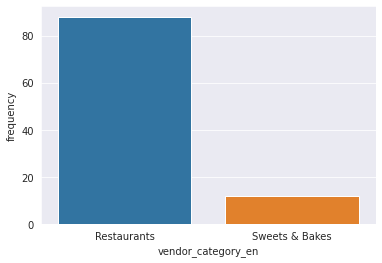

In [ ]:
sns.barplot(x = "vendor_category_en" , y = "frequency"  , data = vendor_category_en)  

> Among the 100 vendors, 88 of them are resturants and 12 of them are Sweets & Bakes

In [ ]:
#getting (latitude,longitude) of vendors = Bakes & Sweets
vendor_id_lat_lon_bs = vendors[vendors["vendor_category_en"] == "Sweets & Bakes" ][['id' , "latitude" , 'longitude']]
vendor_id_lat_lon_bs = vendor_id_lat_lon_bs.reset_index(drop=True)
vendor_id_lat_lon_bs

id    latitude  longitude
0    85   -0.600173   0.755861
1    86   -0.498135   0.058017
2   115    0.578865   0.528270
3   196   -1.787413   0.006934
4   199    2.337754   0.699575
5   221    0.025821   0.551594
6   231  205.242327  44.210807
7   265   -0.861073  -0.065147
8   274    0.305321   0.559974
9   386   -1.002137   0.078609
10  401    0.001904   0.547155
11  575   -0.610692   0.072091

In [ ]:
#plotting Bakes&Sweet vendors with purple markers
#Restaurants : orange marker
for i in range (12):
    id_bs = vendor_id_lat_lon_bs['id'][i]
    lat_bs= vendor_id_lat_lon_bs['latitude'][i]
    lon_bs=vendor_id_lat_lon_bs['longitude'][i]
    folium.Marker(location = [lat_bs, lon_bs], popup= "Sweets & Bakes : " + str(id_bs), tooltip="Sweets & Bakes : "+ str(id_bs) ,  icon=folium.Icon(color="purple")).add_to(m)

m

<font color = red > **Interpretation** </font>

>1. 88% of the vednors are Restaurants and 12% of the vendors are Bakes & Sweets


##### **vendor_category_id**

In [ ]:
vendor_category_id= vendors.groupby(['vendor_category_id'], dropna=False, as_index=False).size()
vendor_category_id.columns = ['vendor_category_id' , 'frequency']
vendor_category_id

vendor_category_id  frequency
0                 2.0         89
1                 3.0         11

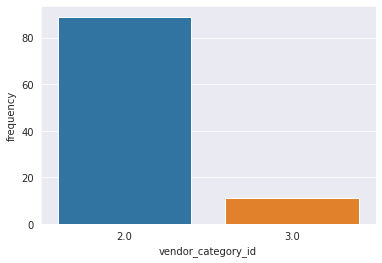

In [ ]:
sns.barplot(x = "vendor_category_id" , y = "frequency" , data = vendor_category_id)

> From vendor_category_en we know that 88 vendors are Restuarants and 12 vendors are Bakes & Sweets. We expect that there are two category id's with one category having frequency 88 and the other having frequency 12. This is not seen in the above plot. Let's further analyse this

In [ ]:
#grouping vendors based on vendor category and vendor category id
vendor_category_en_id= vendors.groupby([ "vendor_category_en" , 'vendor_category_id'], dropna=False, as_index=False).size()
vendor_category_en_id.columns = ['vendor_category_en' , 'vendor_category_id' , 'frequency']
vendor_category_en_id

vendor_category_en  vendor_category_id  frequency
0        Restaurants                 2.0         88
1     Sweets & Bakes                 2.0          1
2     Sweets & Bakes                 3.0         11

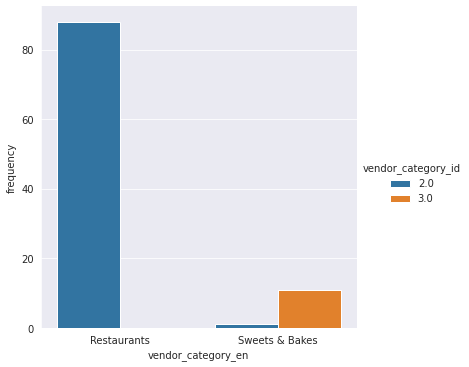

In [ ]:
sns.catplot(x='vendor_category_en', y='frequency', hue='vendor_category_id', data=vendor_category_en_id, kind='bar')

> There is a high chance that one of the Sweets & Bakes was given a wrong category id. This can be changed to the id of the majority Sweets & Bakes

<font color = red > **Interpretation** </font>

>There are two vendor_category_id. Id = 2 represents restuarants and Id = 3 represents Bakes & Sweets


##### **delivery_charge**

In [ ]:
delivery_charge= vendors.groupby([ 'delivery_charge'], dropna=False, as_index=False).size()
delivery_charge

delivery_charge  size
0              0.0    41
1              0.7    59

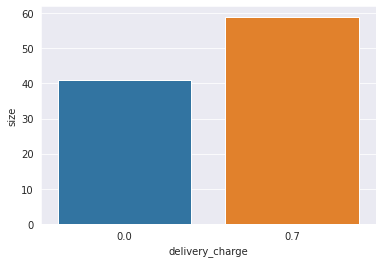

In [ ]:
sns.barplot(x = "delivery_charge" , y = "size"  , data = delivery_charge)  

> 41% of vendors provide free delivery

In [ ]:
#delivery charge based on vendor type
delivery_charge_cat_en= vendors.groupby([ 'vendor_category_en' , 'delivery_charge'], dropna=False, as_index=False).size()
delivery_charge_cat_en

vendor_category_en  delivery_charge  size
0        Restaurants              0.0    34
1        Restaurants              0.7    54
2     Sweets & Bakes              0.0     7
3     Sweets & Bakes              0.7     5

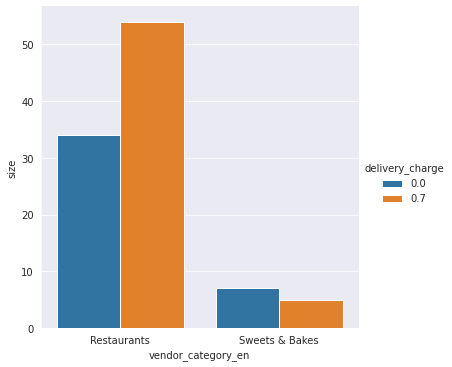

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='delivery_charge', data=delivery_charge_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

>Among Restaurants and Bakes & Sweets, 61% of Restaurants charge for delivery of food. 29% of Bakes & Sweets have a delievry fee


##### **serving_distance**

In [ ]:
serving_distance= vendors.groupby([ 'serving_distance'], dropna=False, as_index=False).size()
serving_distance

serving_distance  size
0               2.0     1
1               3.0     1
2               5.0    10
3               6.0     8
4               7.0     1
5               8.0     8
6              10.0    12
7              12.0     1
8              14.0     1
9              15.0    57

In [ ]:
#descriptive statistics of vendors serving distance
vendors['serving_distance'].describe()

count    100.000000
mean      11.750000
std        4.108073
min        2.000000
25%        8.000000
50%       15.000000
75%       15.000000
max       15.000000
Name: serving_distance, dtype: float64

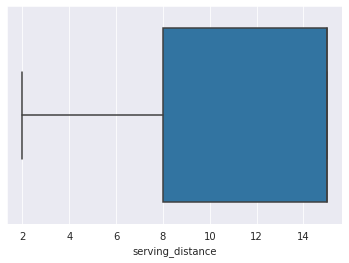

In [ ]:
sns.boxplot(x=vendors["serving_distance"])



> 57% of vendors have a serving distance of maximum 15km. No vendor provides a serving distnace of more than 15km


In [ ]:
#serving distnace based on vendor type
serving_distance_cat_en= vendors.groupby([ 'vendor_category_en' , 'serving_distance'], dropna=False, as_index=False).size()
serving_distance_cat_en

vendor_category_en  serving_distance  size
0         Restaurants               2.0     1
1         Restaurants               3.0     1
2         Restaurants               5.0     9
3         Restaurants               6.0     8
4         Restaurants               7.0     1
5         Restaurants               8.0     8
6         Restaurants              10.0     9
7         Restaurants              12.0     1
8         Restaurants              14.0     1
9         Restaurants              15.0    49
10     Sweets & Bakes               5.0     1
11     Sweets & Bakes              10.0     3
12     Sweets & Bakes              15.0     8

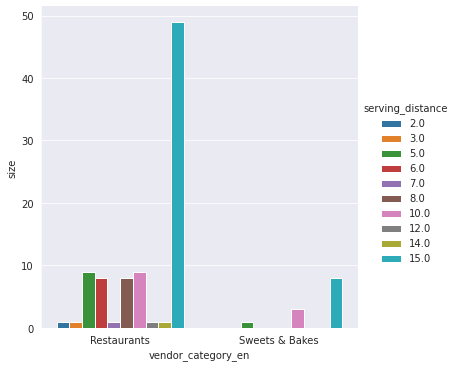

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='serving_distance', data=serving_distance_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

>Irrespective of the type of vendor, majority of the vendors offers a serving diatnce of 15kms followeed by 10kms and 5kms


##### **is_open**

In [ ]:
is_open = (vendors.groupby([ 'is_open'], dropna=False, as_index=False).size()).sort_values("size" , ascending = False)
is_open.columns = ['is_open' , 'frequency']
is_open

is_open  frequency
1      1.0         85
0      0.0         15

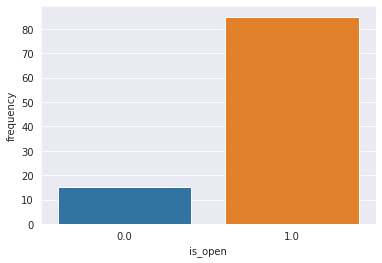

In [ ]:
sns.barplot(x = "is_open" , y = "frequency"  , data = is_open)  

> 85 vendors are opened

In [ ]:
#is_open based on vendor type
is_open_cat_en = vendors.groupby([ 'vendor_category_en' , 'is_open'], dropna=False, as_index=False).size()
is_open_cat_en.columns = ['vendor_category_en' , 'is_open' , 'frequency']
is_open_cat_en

vendor_category_en  is_open  frequency
0        Restaurants      0.0         12
1        Restaurants      1.0         76
2     Sweets & Bakes      0.0          3
3     Sweets & Bakes      1.0          9

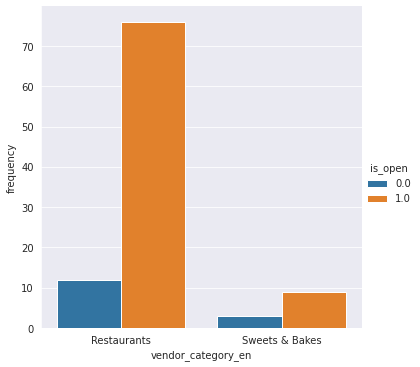

In [ ]:
sns.catplot(x='vendor_category_en', y='frequency', hue='is_open', data=is_open_cat_en, kind='bar')

In [ ]:
#getting the list of vendors that are closed
is_open_0 = vendors[vendors["is_open"] == 0.0][["id" , "vendor_category_en"]]
is_open_0

id vendor_category_en
13   78        Restaurants
29  134        Restaurants
30  145        Restaurants
32  149        Restaurants
37  161        Restaurants
39  180        Restaurants
44  193        Restaurants
46  196     Sweets & Bakes
50  203        Restaurants
53  221     Sweets & Bakes
56  237        Restaurants
57  243        Restaurants
62  274     Sweets & Bakes
65  294        Restaurants
85  578        Restaurants

<font color = red > **Interpretation** </font>

> 1. More number of Bakes&Sweets are closed when compared to Restaurants. is_open = 0  can imply that the vendor has shut down
> 2. Keeping the vendors closed for analysis will be helpful in recommending similar vendors to the customers


##### **OpeningTime & OpeningTime2**

In [ ]:
OpeningTime = (vendors.groupby([ 'OpeningTime'], dropna=False, as_index=False).size()).sort_values("size" , ascending = False)
OpeningTime.columns = ['OpeningTime' , 'frequency']
OpeningTime

OpeningTime  frequency
68               NaN          9
44   11:00AM-11:00PM          5
47   11:00AM-11:45PM          4
14   08:00AM-11:45PM          3
33   10:00AM-11:45PM          3
..               ...        ...
30   09:59AM-11:45PM          1
31   10:00AM-11:00PM          1
1   01.00PM-02:.00AM          1
35   10:59AM-10:30PM          1
34    10:00AM-1:45PM          1

[69 rows x 2 columns]

> 1. Most of the vendors have a different open timing.
> 2. This will be further analyzed while analyzing the day wise opening time of the vendors
> 3. Those vendors that dont have the opening time, it can be obtained by the day wise opening time of the restauarants

In [ ]:
#getting day wise opening time for those vendors whose opening time is missing

OpeningTime_Nan = vendors[vendors['OpeningTime'].isna()][['id' , 'OpeningTime' , "sunday_from_time1" , "sunday_to_time1" , 
                                                          "sunday_from_time2" , "sunday_to_time2" ,
                                                           "monday_from_time1" , "monday_to_time1" ,
                                                          "monday_from_time2" , "monday_to_time2" ,
                                                           "tuesday_from_time1" , "tuesday_to_time1" ,
                                                          "tuesday_from_time2" , "tuesday_to_time2",
                                                           "wednesday_from_time1" , "wednesday_to_time1" ,
                                                          "wednesday_from_time2" , "wednesday_to_time2",
                                                           "thursday_from_time1" , "thursday_to_time1" ,
                                                          "thursday_from_time2" , "thursday_to_time2",
                                                           "friday_from_time1" , "friday_to_time1" ,
                                                          "friday_from_time2" , "friday_to_time2",
                                                           "saturday_from_time1" , "saturday_to_time1" ,
                                                          "saturday_from_time2" , "saturday_to_time2"]]
OpeningTime_Nan

id OpeningTime  ... saturday_from_time2 saturday_to_time2
91  841         NaN  ...            08:00:00          23:59:00
92  843         NaN  ...            08:15:00          23:59:00
93  845         NaN  ...            08:15:00          23:59:00
94  846         NaN  ...            08:15:00          23:59:00
95  849         NaN  ...            08:15:00          23:59:00
96  855         NaN  ...            11:00:00          23:59:00
97  856         NaN  ...            08:15:00          23:59:00
98  858         NaN  ...            08:15:00          23:59:00
99  907         NaN  ...            16:30:00          23:15:00

[9 rows x 30 columns]

> It can be seen that, for those vendors whose OpeningTime is not given, the weekday and weekened timings of the vendors are given. Also for each vendor, its opening timing on monday,tuesday,wednesday,thursday,friday,saturday are the same. Hence the OpeningTime of these vendors can be replaced with its respective OpeningTimimg of each day

In [ ]:
#OpenTiming2

OpeningTime2 = vendors.groupby([ 'OpeningTime2'], dropna=False, as_index=False).size()
OpeningTime2

OpeningTime2  size
0                  -    79
1    00:01AM-02:30AM     3
2    01.00PM-02.00AM     1
3    05:00PM-11:30PM     1
4   05:15PM-09:30PM      1
5    06:00PM-11:45PM     1
6    06:30PM-11:00PM     1
7    09:00AM-11:59PM     1
8          10pm-11pm     1
9    12:00AM-01:00AM     1
10    6:10pm-12:00am     1
11               NaN     9

In [ ]:
#getting the vendor id whose Opening time 2 is missing

OpeningTime2_Nan = vendors[vendors['OpeningTime2'].isna()][['id' , 'OpeningTime2']]
OpeningTime2_Nan

id OpeningTime2
91  841          NaN
92  843          NaN
93  845          NaN
94  846          NaN
95  849          NaN
96  855          NaN
97  856          NaN
98  858          NaN
99  907          NaN

> A vendor either has both OpenTime and OpenTime2 missing or has a value for both OpenTime and OpenTime2

In [ ]:
#merging the vendor ids who have missing openingTime and missing OpeniningTime2

OpeningTime_Nan_all = OpeningTime_Nan.merge(OpeningTime2_Nan)
OpeningTime_Nan_all

id OpeningTime  ... saturday_to_time2 OpeningTime2
0  841         NaN  ...          23:59:00          NaN
1  843         NaN  ...          23:59:00          NaN
2  845         NaN  ...          23:59:00          NaN
3  846         NaN  ...          23:59:00          NaN
4  849         NaN  ...          23:59:00          NaN
5  855         NaN  ...          23:59:00          NaN
6  856         NaN  ...          23:59:00          NaN
7  858         NaN  ...          23:59:00          NaN
8  907         NaN  ...          23:15:00          NaN

[9 rows x 31 columns]

In [ ]:
#Getting all the vendors OpenTime and OpenTime that does not have NaN values

OpeningTime_all = vendors[vendors["OpeningTime"].notnull()][["id" , "OpeningTime" , "OpeningTime2" , "vendor_category_en"]]
OpeningTime_all

id      OpeningTime     OpeningTime2 vendor_category_en
0     4  11:00AM-11:30PM                -        Restaurants
1    13  08:30AM-10:30PM                -        Restaurants
2    20  08:00AM-10:45PM                -        Restaurants
3    23  10:59AM-10:30PM                -        Restaurants
4    28  11:00AM-11:45PM                -        Restaurants
..  ...              ...              ...                ...
86  582  12:00PM-11:59PM                -        Restaurants
87  583  00:01AM-01:00AM  09:00AM-11:59PM        Restaurants
88  676             9-22                -        Restaurants
89  679  08:00AM-11:00PM                -        Restaurants
90  681             9-22                -        Restaurants

[91 rows x 4 columns]

In [ ]:
#Among all the restuarants that dont have missing opening timings,
#getting vendors who dont have an OpenTime 

OpeningTime_dash = OpeningTime_all[OpeningTime_all["OpeningTime"] == "-"]
OpeningTime_dash

Empty DataFrame
Columns: [id, OpeningTime, OpeningTime2, vendor_category_en]
Index: []

> All the restuarants have an OpeningTime

In [ ]:
#Among all the restuarants that dont have missing opening timings,
#getting vendors who dont have an OpeningTime2

OpeningTime2_dash = OpeningTime_all[OpeningTime_all["OpeningTime2"] == "-"]
OpeningTime2_dash

id      OpeningTime OpeningTime2 vendor_category_en
0     4  11:00AM-11:30PM            -        Restaurants
1    13  08:30AM-10:30PM            -        Restaurants
2    20  08:00AM-10:45PM            -        Restaurants
3    23  10:59AM-10:30PM            -        Restaurants
4    28  11:00AM-11:45PM            -        Restaurants
..  ...              ...          ...                ...
85  578  12:00PM-11:59PM            -        Restaurants
86  582  12:00PM-11:59PM            -        Restaurants
88  676             9-22            -        Restaurants
89  679  08:00AM-11:00PM            -        Restaurants
90  681             9-22            -        Restaurants

[79 rows x 4 columns]

> There are 79 vendors who do not have a second shift

vendor_category_en  size
0        Restaurants    69
1     Sweets & Bakes    10

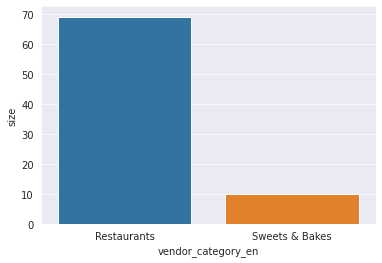

In [ ]:
#grouping the 79 vendors who do not have a secong shift by the vendor type

OpeningTime2_dash_cat_en = OpeningTime2_dash.groupby(["vendor_category_en"] , dropna=False, as_index=False ).size()


sns.barplot(x = "vendor_category_en" , y = "size" , data = OpeningTime2_dash_cat_en ) 

OpeningTime2_dash_cat_en

In [ ]:
#Among the 79 restuarants, checking if they have a common open time range

OpeningTime2_dash_group = OpeningTime2_dash.groupby([ 'OpeningTime'], dropna=False, as_index=False).size()
OpeningTime2_dash_group = OpeningTime2_dash_group.sort_values("size" , ascending = False)

print("Number of categories  : " , OpeningTime2_dash_group.shape[0])
OpeningTime2_dash_group.head(10)

Number of categories  :  56


OpeningTime  size
36  11:00AM-11:00PM     5
39  11:00AM-11:45PM     4
31  10:59AM-11:30PM     3
10  08:00AM-11:45PM     3
27  10:00AM-11:45PM     3
15  08:30AM-11:45PM     3
33  11:00AM-10:30PM     2
26  10:00AM-11:15PM     2
37  11:00AM-11:01PM     2
22  09:00AM-11:45PM     2

> Among the 79 vendors, most of the evndors have a different opentiming range

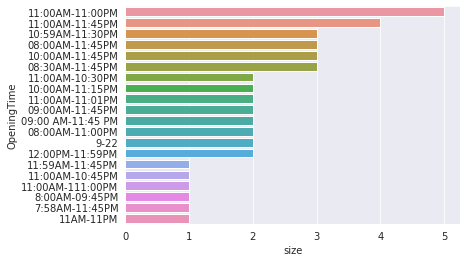

In [ ]:
sns.barplot(x = "size" , y = "OpeningTime"  , data = OpeningTime2_dash_group[:20])  

[(0.0, 5.0)]

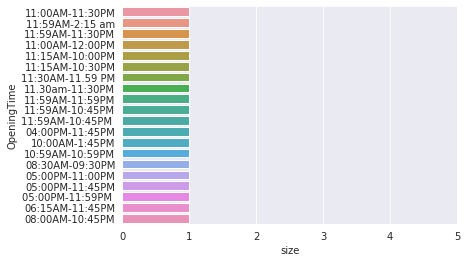

In [ ]:
fig = sns.barplot(x = "size" , y = "OpeningTime"  , data = OpeningTime2_dash_group[20: 40])  
fig.set(xlim=(0, 5))

[(0.0, 5.0)]

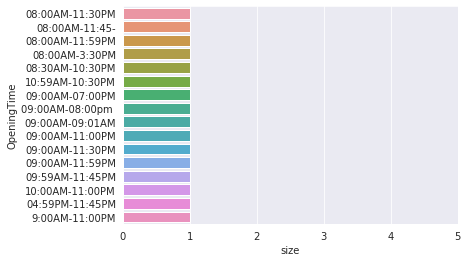

In [ ]:
fig = sns.barplot(x = "size" , y = "OpeningTime"  , data = OpeningTime2_dash_group[40: ])  
fig.set(xlim=(0, 5))

> 1.  Majority of vendors are open from morning to night. Hence they dont have a second opening time. 
> 2. From the above graphs, there are few vendors who open only in the afternoon (afternoon - night) 


In [ ]:
#Getting all the vendors that have 2 shifts

OpeningTime_no_dash = OpeningTime_all[OpeningTime_all["OpeningTime2"] != "-"]
print("Number of vendors having 2 shifts : " , OpeningTime_no_dash.shape[0] )
OpeningTime_no_dash

Number of vendors having 2 shifts :  12


id       OpeningTime      OpeningTime2 vendor_category_en
15   81   08:00AM-12:30PM   05:00PM-11:30PM        Restaurants
34  157    10:59AM-3:30PM   06:30PM-11:00PM        Restaurants
37  161   11:00AM-11:59PM   12:00AM-01:00AM        Restaurants
45  195   05:30PM-11:59PM   00:01AM-02:30AM        Restaurants
46  196   06:00PM-11:59PM   00:01AM-02:30AM     Sweets & Bakes
49  201    11:00AM-3:50pm    6:10pm-12:00am        Restaurants
51  207   11:00AM-04:00PM   06:00PM-11:45PM        Restaurants
55  231          9am-10pm         10pm-11pm     Sweets & Bakes
56  237   08:30PM-11:59PM   00:01AM-02:30AM        Restaurants
57  243  01.00PM-02:.00AM   01.00PM-02.00AM        Restaurants
63  288   11:15AM-03:00PM  05:15PM-09:30PM         Restaurants
87  583   00:01AM-01:00AM   09:00AM-11:59PM        Restaurants

vendor_category_en  size
0        Restaurants    10
1     Sweets & Bakes     2

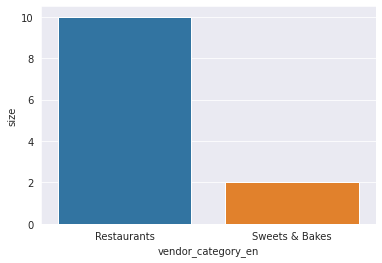

In [ ]:
#grouping vendors that have 2 shifts by vendor type

OpeningTime_no_dash_cat_en = OpeningTime_no_dash.groupby(["vendor_category_en"] , dropna=False, as_index=False ).size()


sns.barplot(x = "vendor_category_en" , y = "size" , data = OpeningTime_no_dash_cat_en ) 

OpeningTime_no_dash_cat_en

In [ ]:
#Checking if there is any common opentiming among the vendors having 2 shifts

OpeningTime_no_dash_group_ot = OpeningTime_no_dash.groupby([ 'OpeningTime'], dropna=False, as_index=False).size()
OpeningTime_no_dash_group_ot = OpeningTime_no_dash_group_ot.sort_values("size" , ascending = False)
print("Number of categories  : " , OpeningTime_no_dash_group_ot.shape[0])
OpeningTime_no_dash_group_ot

Number of categories  :  12


OpeningTime  size
0    00:01AM-01:00AM     1
1   01.00PM-02:.00AM     1
2    05:30PM-11:59PM     1
3    06:00PM-11:59PM     1
4    08:00AM-12:30PM     1
5    08:30PM-11:59PM     1
6     10:59AM-3:30PM     1
7    11:00AM-04:00PM     1
8    11:00AM-11:59PM     1
9     11:00AM-3:50pm     1
10   11:15AM-03:00PM     1
11          9am-10pm     1

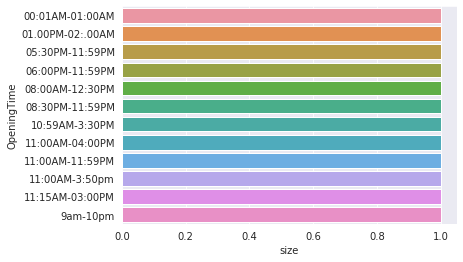

In [ ]:
sns.barplot(x = "size" , y = "OpeningTime"  , data = OpeningTime_no_dash_group_ot)  

In [ ]:
#Checking if there is any common opentiming2 among the vendors having 2 shifts

OpeningTime_no_dash_group_ot2 = OpeningTime_no_dash.groupby([ 'OpeningTime2'], dropna=False, as_index=False).size()
OpeningTime_no_dash_group_ot2 = OpeningTime_no_dash_group_ot2.sort_values("size" , ascending = False)
print("Number of categories  : " , OpeningTime_no_dash_group_ot2.shape[0])
OpeningTime_no_dash_group_ot2

Number of categories  :  10


OpeningTime2  size
0   00:01AM-02:30AM     3
1   01.00PM-02.00AM     1
2   05:00PM-11:30PM     1
3  05:15PM-09:30PM      1
4   06:00PM-11:45PM     1
5   06:30PM-11:00PM     1
6   09:00AM-11:59PM     1
7         10pm-11pm     1
8   12:00AM-01:00AM     1
9    6:10pm-12:00am     1

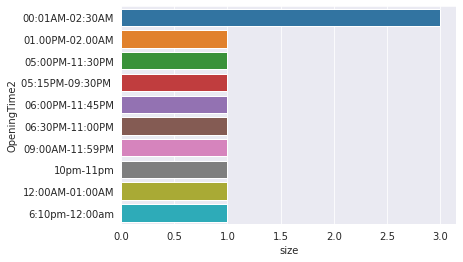

In [ ]:
sns.barplot(x = "size" , y = "OpeningTime2"  , data = OpeningTime_no_dash_group_ot2)  

<font color = red > **Interpretation** </font>

> 1. Irrespective if a vendor has 1 shift or 2 shift, most of the vendors have a different opening timing range
> 2. Since no clear idea can been got with analysing just the opentime and opentime2, analysing the opening and closing timing of the vendors day wise would give a better picture on each vendors opening time


##### **prepration_time**

In [ ]:
prepration_time = vendors.groupby([ 'prepration_time'], dropna=False, as_index=False).size()
prepration_time.columns = ['prepration_time' , 'frequency']
prepration_time

prepration_time  frequency
0                 5          1
1                10         25
2                11          5
3                12          2
4                13          5
5                14          7
6                15         36
7                16          4
8                17          6
9                18          2
10               19          2
11               20          3
12               21          1
13               45          1

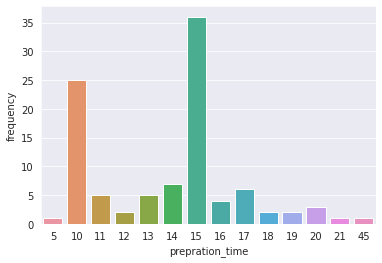

In [ ]:
sns.barplot(x = "prepration_time" , y = "frequency" , data = prepration_time ) 

In [ ]:
prepration_time['prepration_time'].describe()

count    14.000000
mean     16.857143
std       9.189100
min       5.000000
25%      12.250000
50%      15.500000
75%      18.750000
max      45.000000
Name: prepration_time, dtype: float64

> 15 minutes is roughly the amount of time taken by most of the vendors for preparing the food

In [ ]:
#prepration time based on vendor type

prepration_time_cat_en = vendors.groupby([ 'vendor_category_en' , 'prepration_time'], dropna=False, as_index=False).size()
prepration_time_cat_en.columns = ['vendor_category_en' , 'prepration_time' , 'frequency']
prepration_time_cat_en

vendor_category_en  prepration_time  frequency
0         Restaurants                5          1
1         Restaurants               10         24
2         Restaurants               11          5
3         Restaurants               12          2
4         Restaurants               13          2
5         Restaurants               14          7
6         Restaurants               15         30
7         Restaurants               16          4
8         Restaurants               17          5
9         Restaurants               18          2
10        Restaurants               19          2
11        Restaurants               20          3
12        Restaurants               21          1
13     Sweets & Bakes               10          1
14     Sweets & Bakes               13          3
15     Sweets & Bakes               15          6
16     Sweets & Bakes               17          1
17     Sweets & Bakes               45          1

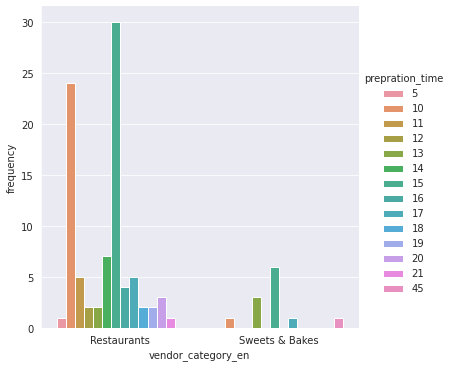

In [ ]:
sns.catplot(x='vendor_category_en', y='frequency', hue='prepration_time', data=prepration_time_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

> 1. Prepration time varies between 5 to 45 minutes
> 2. For both Restauarants and Bakes&Sweets, 15minutes time is taken by most of the vendors
> 3. This is followed by 10 minutes for restuarants and 13 minutes for Bakes&Sweets
> 4. Resturants prepratiom time ranges from 5 to 21 minutes and 10 to 45 minutes for Bakes&Sweets


##### **commission**

In [ ]:
commission = vendors.groupby([ 'commission'], dropna=False, as_index=False).size()
commission.columns = ['commission' , 'frequency']
#NaN value is replaced by -1
commission.at[1,'commission'] = -1
commission

commission  frequency
0         0.0         85
1        -1.0         15

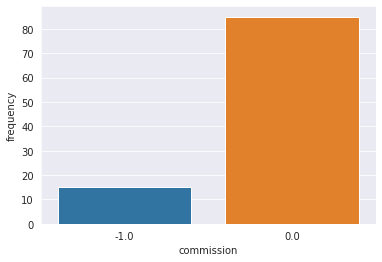

In [ ]:
sns.barplot(x = "commission" , y = "frequency" , data = commission ) 

> 85% of vendors do not charge for commission

In [ ]:
commission_cat_en = vendors.groupby([ 'vendor_category_en' , 'commission'], dropna=False, as_index=False).size()
commission_cat_en .columns = ['vendor_category_en' , 'commission' , 'frequency']

#NaN value is replaced by -1
commission_cat_en.at[1,'commission'] = -1

commission_cat_en


vendor_category_en  commission  frequency
0        Restaurants         0.0         73
1        Restaurants        -1.0         15
2     Sweets & Bakes         0.0         12

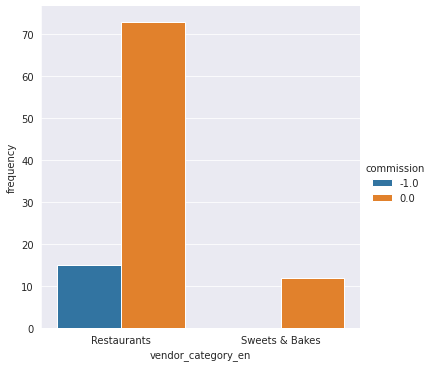

In [ ]:
sns.catplot(x='vendor_category_en', y='frequency', hue='commission', data=commission_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

> 1. 85% of vendors do not take commission
> 2. 12% of vendors who take commission are Restauarants


##### **is_akeed_delivering**

In [ ]:
is_akeed_delivering = vendors.groupby([ 'is_akeed_delivering'], dropna=False, as_index=False).size()
is_akeed_delivering

is_akeed_delivering  size
0                 Yes   100

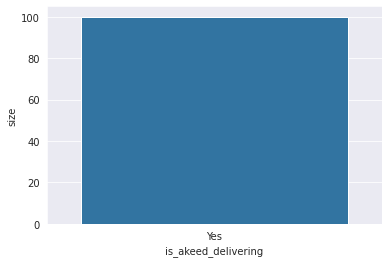

In [ ]:
sns.barplot(x = "is_akeed_delivering" , y = "size" , data = is_akeed_delivering ) 

<font color = red > **Interpretation** </font>

> Akeed provides delievry of food from all the vendors


##### **discount_percentage**

In [ ]:
discount_percentage = vendors.groupby([ 'discount_percentage'], dropna=False, as_index=False).size()
discount_percentage

discount_percentage  size
0                  0.0    96
1                 10.0     1
2                 15.0     1
3                 35.0     1
4                 50.0     1

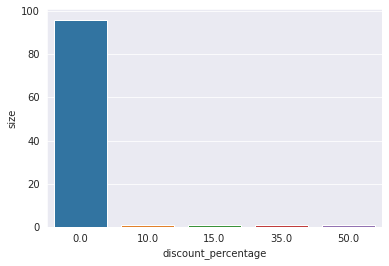

In [ ]:
sns.barplot(x = "discount_percentage" , y = "size" , data = discount_percentage ) 

> Only 4% of the vendors provide a discount

In [ ]:
discount_percentage_cat_en = vendors.groupby([ 'vendor_category_en','discount_percentage'], dropna=False, as_index=False).size()
discount_percentage_cat_en

vendor_category_en  discount_percentage  size
0        Restaurants                  0.0    85
1        Restaurants                 10.0     1
2        Restaurants                 15.0     1
3        Restaurants                 35.0     1
4     Sweets & Bakes                  0.0    11
5     Sweets & Bakes                 50.0     1

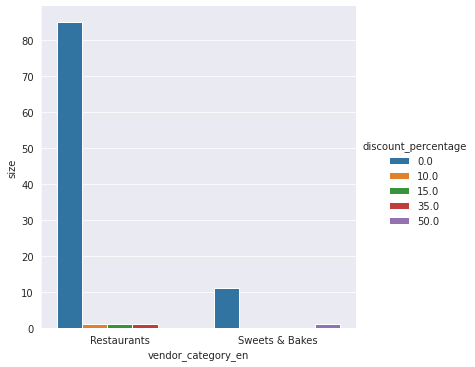

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='discount_percentage', data=discount_percentage_cat_en, kind='bar')

> Among the 4% of vendors that provide discounts, 3% of vendors are Restauarants and 1% of vendor is Bakes&Sweets

<font color = red > **Interpretation** </font>

> 1. 96% of vendors, do not provide any discount
> 2. 3% of Restaurants provide a discount of either 10 , 15 or 30 %
> 3. 1% of Bakes&Sweets provide a discount of 50%


##### **status**

In [ ]:
status = vendors.groupby([ 'status'], dropna=False, as_index=False).size()
status

status  size
0     0.0    15
1     1.0    85

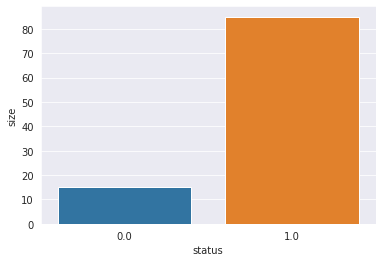

In [ ]:
sns.barplot(x = "status" , y = "size"  , data = status)  

In [ ]:
#status based on vendor type
status_cat_en = vendors.groupby([ 'vendor_category_en' , 'status'], dropna=False, as_index=False).size()
status_cat_en

vendor_category_en  status  size
0        Restaurants     0.0    12
1        Restaurants     1.0    76
2     Sweets & Bakes     0.0     3
3     Sweets & Bakes     1.0     9

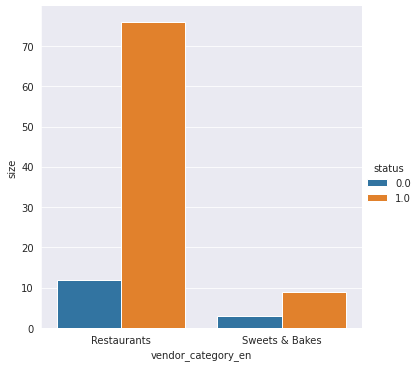

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='status', data=status_cat_en, kind='bar')

> 1. From the above plot, it can be seen that, the number of vendors that have a status = 0 , is equal to the number of vendors that has is_open = 0.
> 2. Let's further anlayse if the restusrants that have is_open = 0 also have status = 0

In [ ]:
#vendor's status and is_open based on vendor type
vendors.groupby([ 'vendor_category_en' , 'is_open' , 'status'], dropna=False, as_index=False).size()

vendor_category_en  is_open  status  size
0        Restaurants      0.0     0.0    12
1        Restaurants      1.0     1.0    76
2     Sweets & Bakes      0.0     0.0     3
3     Sweets & Bakes      1.0     1.0     9

> It can be seen that those restuarants that is closed also has a status = 0. This can imply that status checks if a vendor is avaialable or not

<font color = red > **Interpretation** </font>

> 1. The vendors that have a status = 0 , is closed


##### **verified**

In [ ]:
verified = vendors.groupby([ 'verified'], dropna=False, as_index=False).size()
verified

verified  size
0         0    12
1         1    88

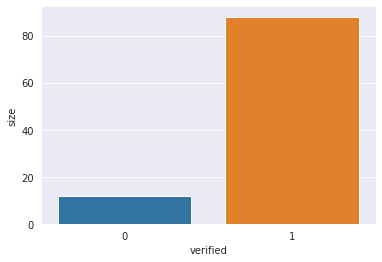

In [ ]:
sns.barplot(x = "verified" , y = "size"  , data = verified)  

> 88% of vendors have their account verified

In [ ]:
#verified value based on vendor type
verified_cat_en = vendors.groupby([ "vendor_category_en" , 'verified'], dropna=False, as_index=False).size()
verified_cat_en

vendor_category_en  verified  size
0        Restaurants         0    10
1        Restaurants         1    78
2     Sweets & Bakes         0     2
3     Sweets & Bakes         1    10

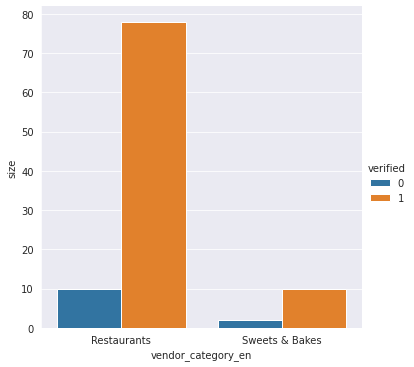

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='verified', data=verified_cat_en, kind='bar')

> Majority of the vendors have their account verified

In [ ]:
#status , verified combination
verified_status = vendors.groupby([ 'status', 'verified'], dropna=False, as_index=False).size()
verified_status

status  verified  size
0     0.0         0    12
1     0.0         1     3
2     1.0         1    85

In [ ]:
#percenatge of vendors with the following categories
#status = 0 , verified = 0
#status = 1 , verified = 1
#status = 0 , verified = 1

verified_status["percenatge"] = (verified_status['size']/verified_status['size'].sum())*100
verified_status['status_verified'] = verified_status['status'].apply(str) + " ; " + verified_status['verified'].apply(str)

fig = px.pie(values=verified_status["percenatge"], names=verified_status['status_verified'])
fig.show()

verified_status

status  verified  size  percenatge status_verified
0     0.0         0    12        12.0         0.0 ; 0
1     0.0         1     3         3.0         0.0 ; 1
2     1.0         1    85        85.0         1.0 ; 1

> Out of the 15% of vendors whose account is not verified, 12% of total vendors have their status = 0

<font color = red > **Interpretation** </font>

> 1. 85% of vendors have their account verified and has status = 0. 
<br>Out of the 15% of vendors whose account is not verified, 12% of the total vendors is not opened (status = 0) 


##### **rank**

In [ ]:
rank = vendors.groupby([ 'rank'], dropna=False, as_index=False).size()
rank

rank  size
0     1    11
1    11    89

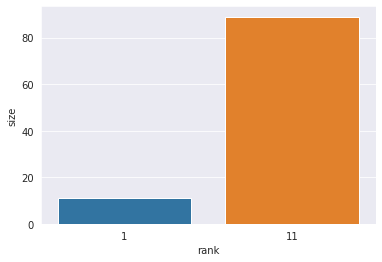

In [ ]:
sns.barplot(x = "rank" , y = "size"  , data = rank)  

In [ ]:
#rank based on vendor type
rank_cat_en = vendors.groupby([ 'vendor_category_en','rank'], dropna=False, as_index=False).size()
rank_cat_en

vendor_category_en  rank  size
0        Restaurants     1    10
1        Restaurants    11    78
2     Sweets & Bakes     1     1
3     Sweets & Bakes    11    11

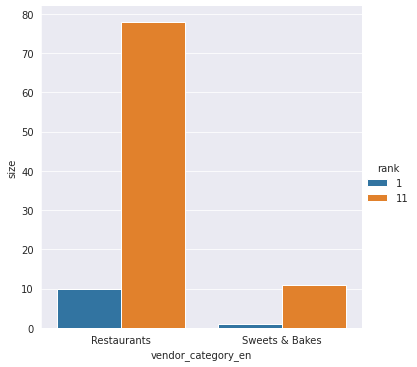

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='rank', data=rank_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

> 1. 89% of vendors have a rank = 11
> 2. Restauarnts : 88% (78/88) are ranked 11
> 3. Sweets&Bakes : 92% (11/12) are ranked 11


##### **language**

In [ ]:
language = vendors.groupby([ 'language'], dropna=False, as_index=False).size()
language.at[1, 'language'] = "NaN"
language

language  size
0       EN    85
1      NaN    15

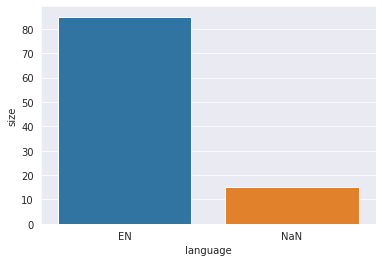

In [ ]:
sns.barplot(x = "language" , y = "size"  , data = language)  

In [ ]:
language_cat_en = vendors.groupby([ 'vendor_category_en','language'], dropna=False, as_index=False).size()
language_cat_en.at[1,'language'] = "NaN"
language_cat_en

vendor_category_en language  size
0        Restaurants       EN    73
1        Restaurants      NaN    15
2     Sweets & Bakes       EN    12

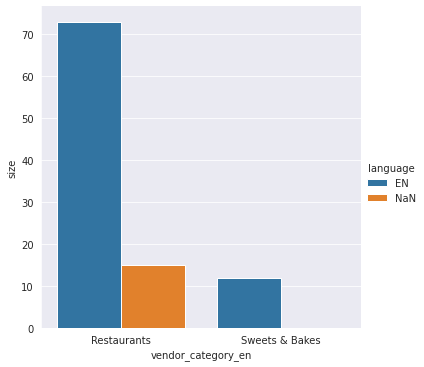

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='language', data=language_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

> 1. 85% of vendors communicate in English.
> 2. Among the 88 Restaurants, 15 restuarnts langauge is unknown
> 3. All Sweets&Bakes communicate in English



##### **vendor_rating**

In [ ]:
vendor_rating = vendors.groupby([ 'vendor_rating'], dropna=False, as_index=False).size()
vendor_rating

vendor_rating  size
0             3.2     1
1             3.7     1
2             3.8     2
3             4.0     6
4             4.1     5
5             4.2    15
6             4.3    18
7             4.4    14
8             4.5    19
9             4.6    10
10            4.7     7
11            4.8     2

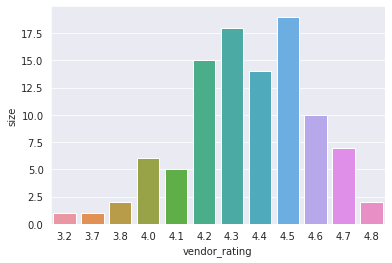

In [ ]:
sns.barplot(x = "vendor_rating" , y = "size"  , data = vendor_rating)  

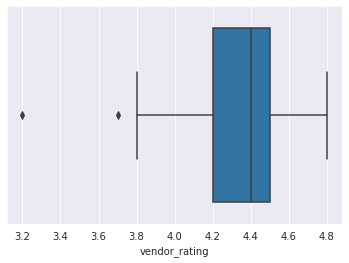

In [ ]:
sns.boxplot(x=vendors["vendor_rating"])

> 1. The rating of the vendors ranges from 3.2 to 4.8.
> 2. This implies that the rating scale used is 1-5 
> 3. 19% of vendors are rated 4.5 (mode)
> 4. 2% of vendors are rated 4.8 (max)
> 5. 1% of vendors are rated 3.2 (min)

In [ ]:
#checking if there is a relationship between rank feature and vendors_rating

rank_rating = vendors[['rank' , 'vendor_rating']]
rank_rating.head()

rank  vendor_rating
0    11            4.4
1    11            4.7
2     1            4.5
3    11            4.5
4    11            4.4

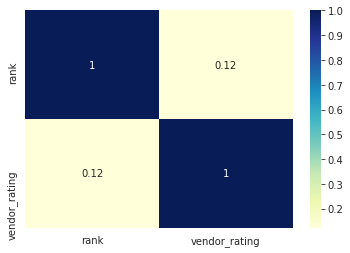

In [ ]:
#correlation graph
sns.heatmap(rank_rating .corr(), cmap="YlGnBu", annot=True)

> There is not strong correlation between rank and vendor_rating

<font color = red > **Interpretation** </font>

> 1. 4.5 rating is the most common rating of the vendors.
> 2. The correlation between rank and vendor_rating is not strong. This may imply that the method of assigning a rank to avendor is highly dependnet on other features which may not be avaialable



##### **from_time1 , to_time1 , from_time2 , to_time2**

In [ ]:
#function to convert hh:mm:ss to seconds

def convert_to_sec(time):

  time = time.lower()

  if time == "nan":  #if time is missing
    return float(time)
  else :
 
   h,m,s = time.split(":")[0] , time.split(":")[1] , time.split(":")[2]
  
   h = float(h)*3600
   m = float(m)*60
   s = float(s)
   return (h+m+s)

In [ ]:
#converting the from_time1 feature of all days to seconds

sun_from_time_1 = vendors['sunday_from_time1'].apply(str).apply(convert_to_sec)
sat_from_time_1 = vendors['saturday_from_time1'].apply(str).apply(convert_to_sec)
mon_from_time_1 = vendors['monday_from_time1'].apply(str).apply(convert_to_sec)
tue_from_time_1 = vendors['tuesday_from_time1'].apply(str).apply(convert_to_sec)
wed_from_time_1 = vendors['wednesday_from_time1'].apply(str).apply(convert_to_sec)
thur_from_time_1 = vendors['thursday_from_time1'].apply(str).apply(convert_to_sec)
fri_from_time_1 = vendors['friday_from_time1'].apply(str).apply(convert_to_sec)

In [ ]:
#making a dictionary containing each day of the week with its repective opening time (in seconds) for all the 100 vendors

from_time_1 = {"Sunday" : sun_from_time_1 , "Monday" : mon_from_time_1 , "Tuesday" : tue_from_time_1 , 
               "Wednesday" : wed_from_time_1 , "Thursday" : thur_from_time_1 , "Friday" : fri_from_time_1 ,
               "Saturday" : sat_from_time_1}

from_time_1_df = pd.DataFrame(from_time_1)
from_time_1_df.head()

Sunday   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday
0      0.0      0.0      0.0        0.0       0.0      0.0       0.0
1      0.0      0.0      0.0        0.0       0.0      0.0       0.0
2  28800.0  28800.0  28800.0    28800.0   28800.0  28800.0   28800.0
3  32400.0  32400.0  32400.0    32400.0   32400.0  32400.0   32400.0
4     60.0     60.0     60.0       60.0      60.0     60.0      60.0

In [ ]:
#Plotting a line graph for each day of the weeks opining time of the vendor

trace0 = go.Scatter(
    y = from_time_1_df.Sunday,
    mode = "lines",
    name = "Sunday"
)

trace1 = go.Scatter(
    y = from_time_1_df.Monday,
    mode = "lines" ,
    name = "Monday"
)

trace2 = go.Scatter(
    y = from_time_1_df.Tuesday,
    mode = "lines" ,
    name = "Tuesday"
)

trace3 = go.Scatter(
    y = from_time_1_df.Wednesday,
    mode = "lines" ,
    name = "Wednesday"
)

trace4 = go.Scatter(
    y = from_time_1_df.Thursday,
    mode = "lines" ,
    name = "Thursday"
)

trace5 = go.Scatter(
    y = from_time_1_df.Friday,
    mode = "lines" ,
    name = "Friday"
)

trace6 = go.Scatter(
    y = from_time_1_df.Saturday,
    mode = "lines" ,
    name = "Saturday"
)

data = [trace0 , trace1 , trace2 , trace3 , trace4 , trace5 , trace6 ]

figure = go.Figure(data = data)
figure.show()

> 1. Except Fridays and Saturdays, on the remaining days, the opening time of the vendors follow a similar  pattern
> 2. Most of the vendors opening time is between 30k seconds to 40k seconds. This is hours is between 8:30 am to 11:00 am. 
> 3. On Fridyas and Saturdays, few of the resturants open after 11 am

In [ ]:
#converting the to_time1 feature of all days to seconds

sun_to_time_1 = vendors['sunday_to_time1'].apply(str).apply(convert_to_sec)
sat_to_time_1 = vendors['saturday_to_time1'].apply(str).apply(convert_to_sec)
mon_to_time_1 = vendors['monday_to_time1'].apply(str).apply(convert_to_sec)
tue_to_time_1 = vendors['tuesday_to_time1'].apply(str).apply(convert_to_sec)
wed_to_time_1 = vendors['wednesday_to_time1'].apply(str).apply(convert_to_sec)
thur_to_time_1 = vendors['thursday_to_time1'].apply(str).apply(convert_to_sec)
fri_to_time_1 = vendors['friday_to_time1'].apply(str).apply(convert_to_sec)

In [ ]:
#making a dictionary containing each day of the week with its repective closing time (in seconds) for all the 100 vendors

to_time_1 = {"Sunday" : sun_to_time_1 , "Monday" : mon_to_time_1 , "Tuesday" : tue_to_time_1 , 
               "Wednesday" : wed_to_time_1 , "Thursday" : thur_to_time_1 , "Friday" : fri_to_time_1 ,
               "Saturday" : sat_to_time_1}

to_time_1_df = pd.DataFrame(to_time_1)
to_time_1_df.head()

Sunday   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday
0   1800.0   1800.0   1800.0     1800.0    1800.0   1800.0    1800.0
1   5400.0   5400.0   5400.0     5400.0    5400.0   5400.0    5400.0
2  81900.0  81900.0  81900.0    81900.0   81900.0  81900.0   81900.0
3  84600.0  84600.0  84600.0    84600.0   85500.0  85500.0   85500.0
4   1800.0   1800.0   1800.0     1800.0    1800.0   5400.0    5400.0

In [ ]:
#Plotting a line graph for each day of the weeks opining time of the vendor

trace7 = go.Scatter(
    y = to_time_1_df.Sunday,
    mode = "lines",
    name = "Sunday"
)

trace8 = go.Scatter(
    y = to_time_1_df.Monday,
    mode = "lines" ,
    name = "Monday"
)

trace9 = go.Scatter(
    y = to_time_1_df.Tuesday,
    mode = "lines" ,
    name = "Tuesday"
)

trace10 = go.Scatter(
    y = to_time_1_df.Wednesday,
    mode = "lines" ,
    name = "Wednesday"
)

trace11 = go.Scatter(
    y = to_time_1_df.Thursday,
    mode = "lines" ,
    name = "Thursday"
)

trace12 = go.Scatter(
    y = to_time_1_df.Friday,
    mode = "lines" ,
    name = "Friday"
)

trace13 = go.Scatter(
    y = to_time_1_df.Saturday,
    mode = "lines" ,
    name = "Saturday"
    
)

data = [trace7 , trace8 , trace9 , trace10 , trace11 , trace12 , trace13 ]

figure = go.Figure(data = data)
figure.show()

> 1. Across all days, the vendors for a similar closing time of shift 1
> 2. Closing hourse below 10K, implies that, the vendors closes during the early hours of the next day

In [ ]:
#converting the from_time2 feature of all days to seconds - shift 2

sun_from_time_2 = vendors['sunday_from_time2'].apply(str).apply(convert_to_sec)
sat_from_time_2 = vendors['saturday_from_time2'].apply(str).apply(convert_to_sec)
mon_from_time_2 = vendors['monday_from_time2'].apply(str).apply(convert_to_sec)
tue_from_time_2 = vendors['tuesday_from_time2'].apply(str).apply(convert_to_sec)
wed_from_time_2 = vendors['wednesday_from_time2'].apply(str).apply(convert_to_sec)
thur_from_time_2 = vendors['thursday_from_time2'].apply(str).apply(convert_to_sec)
fri_from_time_2 = vendors['friday_from_time2'].apply(str).apply(convert_to_sec)

In [ ]:
#making a dictionary containing each day of the week with its respective opening time (in seconds) for all the 100 vendors - shift 2

from_time_2 = {"Sunday" : sun_from_time_2 , "Monday" : mon_from_time_2 , "Tuesday" : tue_from_time_2 , 
               "Wednesday" : wed_from_time_2 , "Thursday" : thur_from_time_2 , "Friday" : fri_from_time_2 ,
               "Saturday" : sat_from_time_2}

from_time_2_df = pd.DataFrame(from_time_2)
from_time_2_df.head()

Sunday   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday
0  28800.0  28800.0  28800.0    28800.0   28800.0  36000.0   36000.0
1  28800.0  28800.0  28800.0    28800.0   28800.0  28800.0   28800.0
2      NaN      NaN      NaN        NaN       NaN      NaN       NaN
3      NaN      NaN      NaN        NaN       NaN      NaN       NaN
4  39600.0  39600.0  39600.0    39600.0   39600.0  63900.0   63900.0

In [ ]:
#Plotting a line graph for each day of the weeks opining time of the vendor - shift 2

trace14 = go.Scatter(
    y = from_time_2_df.Sunday,
    mode = "lines",
    name = "Sunday"
)

trace15 = go.Scatter(
    y = from_time_2_df.Monday,
    mode = "lines" ,
    name = "Monday"
)

trace16 = go.Scatter(
    y = from_time_2_df.Tuesday,
    mode = "lines" ,
    name = "Tuesday"
)

trace17 = go.Scatter(
    y = from_time_2_df.Wednesday,
    mode = "lines" ,
    name = "Wednesday"
)

trace18 = go.Scatter(
    y = from_time_2_df.Thursday,
    mode = "lines" ,
    name = "Thursday"
)

trace19 = go.Scatter(
    y = from_time_2_df.Friday,
    mode = "lines" ,
    name = "Friday"
)

trace20 = go.Scatter(
    y = from_time_2_df.Saturday,
    mode = "lines" ,
    name = "Saturday"
)

data = [trace14 , trace15 , trace16 , trace17 , trace18 , trace19 , trace20 ]

figure = go.Figure(data = data)
figure.show()

> 1. Multiple breaks in the graph suggests that, restuarants dont have a second shift. Majority of the vendors have just first shift starting from mornig and winding up in the evening/night
> 2. Among all the days, vendors have a second shift on saturdays

In [ ]:
#converting the to_time1 feature of all days to seconds -shift 2

sun_to_time_2 = vendors['sunday_to_time2'].apply(str).apply(convert_to_sec)
sat_to_time_2 = vendors['saturday_to_time2'].apply(str).apply(convert_to_sec)
mon_to_time_2 = vendors['monday_to_time2'].apply(str).apply(convert_to_sec)
tue_to_time_2 = vendors['tuesday_to_time2'].apply(str).apply(convert_to_sec)
wed_to_time_2 = vendors['wednesday_to_time2'].apply(str).apply(convert_to_sec)
thur_to_time_2 = vendors['thursday_to_time2'].apply(str).apply(convert_to_sec)
fri_to_time_2 = vendors['friday_to_time2'].apply(str).apply(convert_to_sec)


In [ ]:
#making a dictionary containing each day of the week with its repective closing time (in seconds) for all the 100 vendors

to_time_2 = {"Sunday" : sun_to_time_2 , "Monday" : mon_to_time_2 , "Tuesday" : tue_to_time_2 , 
               "Wednesday" : wed_to_time_2 , "Thursday" : thur_to_time_2 , "Friday" : fri_to_time_2 ,
               "Saturday" : sat_to_time_2}

to_time_2_df = pd.DataFrame(to_time_2)
to_time_2_df.head()

Sunday   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday
0  86340.0  86340.0  86340.0    86340.0   86340.0  86340.0   86340.0
1  86340.0  86340.0  86340.0    70200.0   70200.0  86340.0   86340.0
2      NaN      NaN      NaN        NaN       NaN      NaN       NaN
3      NaN      NaN      NaN        NaN       NaN      NaN       NaN
4  86340.0  86340.0  86340.0    86340.0   86340.0  86340.0   86340.0

In [ ]:
#Plotting a line graph for each day of the weeks opining time of the vendor

trace21 = go.Scatter(
    y = to_time_2_df.Sunday,
    mode = "lines",
    name = "Sunday"
)

trace22 = go.Scatter(
    y = to_time_2_df.Monday,
    mode = "lines" ,
    name = "Monday"
)

trace23 = go.Scatter(
    y = to_time_2_df.Tuesday,
    mode = "lines" ,
    name = "Tuesday"
)

trace24 = go.Scatter(
    y = to_time_2_df.Wednesday,
    mode = "lines" ,
    name = "Wednesday"
)

trace25 = go.Scatter(
    y = to_time_2_df.Thursday,
    mode = "lines" ,
    name = "Thursday"
)

trace26 = go.Scatter(
    y = to_time_2_df.Friday,
    mode = "lines" ,
    name = "Friday"
)

trace27 = go.Scatter(
    y = to_time_2_df.Saturday,
    mode = "lines" ,
    name = "Saturday"
)

data = [trace21 , trace22 , trace23 , trace24 , trace25 , trace26 , trace27 ]

figure = go.Figure(data = data)
figure.show()

> 1. On Saturdays, the closing time of the vendors are late nights, with few vendors closing during the eraly hours of the next day

<font color = red > **Interpretation** </font>

> 1. Majority of the vendors have a single shift starting from morning and ending at night
> 2. Fridays and Saturdays have a different pattern when compared to the other days of the week
> 3. Second shift of vendors (few) are mostly seen on Saturdays


##### **primary_tags , vendor_tag , vendor_tag_name**



In [ ]:
primary_tags = vendors.groupby([ 'primary_tags'], dropna=False, as_index=False).size()
print("Number of unique primary tags : ", len(primary_tags))
primary_tags

Number of unique primary tags :  43


primary_tags  size
0   {"primary_tags":"1065"}     1
1   {"primary_tags":"1088"}     3
2   {"primary_tags":"1147"}     1
3   {"primary_tags":"1256"}     1
4    {"primary_tags":"129"}     1
5    {"primary_tags":"134"}    10
6   {"primary_tags":"1348"}     1
7    {"primary_tags":"138"}     1
8     {"primary_tags":"15"}     1
9    {"primary_tags":"180"}     1
10   {"primary_tags":"204"}     1
11  {"primary_tags":"2072"}     3
12    {"primary_tags":"21"}     2
13  {"primary_tags":"2396"}     8
14    {"primary_tags":"24"}     3
15   {"primary_tags":"260"}     1
16   {"primary_tags":"270"}     1
17   {"primary_tags":"271"}     1
18    {"primary_tags":"28"}     2
19   {"primary_tags":"297"}     1
20    {"primary_tags":"31"}     1
21    {"primary_tags":"32"}     3
22   {"primary_tags":"323"}     1
23   {"primary_tags":"336"}     1
24   {"primary_tags":"346"}     1
25    {"primary_tags":"35"}     1
26     {"primary_tags":"4"}     1
27    {"primary_tags":"46"}     3
28   {"primary_tags":"462"}     1
29    {"primary_tags":"47"}     1
30   {"primary_tags":"478"}     1
31    {"primary_tags":"51"}     1
32    {"primary_tags":"52"}     1
33   {"primary_tags":"534"}     1
34   {"primary_tags":"695"}     1
35     {"primary_tags":"7"}     1
36   {"primary_tags":"701"}     3
37    {"primary_tags":"71"}     1
38     {"primary_tags":"8"}     5
39   {"primary_tags":"815"}     1
40   {"primary_tags":"849"}     1
41    {"primary_tags":"90"}     2
42                      NaN    23

> 1. The number of unqiue primary tags are 42 excluding NaN. This can imply that the 100 vendors offers variety of food
> 2. Since all the tag number is given, we will analyse the vendor_tag and vendor_tag_name also to extract the tag_names of the primary tag

In [ ]:
#the primary tag is given in the format of a dictionary which is a string - " {} "
#Here we will extract the primary tag of each vendor

#creating a list of the primary tags
primary_tags_list = list(vendors['primary_tags'])

#list to store the primary tag number of each vendor
primary_tags_numb = []

#loop to extract the primary tag number
for i in primary_tags_list:
  if isinstance(i,str):
    numb = int(re.findall(r'\d+', i)[0])
  else:
    numb = -1  #if NaN is mentioned as the primary tag
    
  primary_tags_numb.append(numb)

#creating a dataframe of the primary tag numbers
primary_tags_numb_d = {"primary_tags" : primary_tags_numb }
primary_tags_numb_df = pd.DataFrame(primary_tags_numb_d)
primary_tags_numb_df

primary_tags
0              4
1              7
2             71
3             46
4             32
..           ...
95          2396
96          2396
97          2396
98          2396
99            24

[100 rows x 1 columns]

In [ ]:
#getting the unique primary tag number
unique_primary_tags = set(primary_tags_numb_df['primary_tags'])

#getting the vendor_tag_numb and vendor_tag_name
vendor_tag = list(vendors['vendor_tag'])
vendor_tag_name = list(vendors['vendor_tag_name'])

In [ ]:
#A vendor can have multiple tag numbers and its corresponding tag name
#Here we try to create a list of all the vendors tags and its name


vendor_tag_numb = []
vendor_tag_names = []

#vendor_tag_numb
for i in vendor_tag:
  if isinstance(i,float):
    i = "-1"  #givivng a tag numb = -1 if tag numb is NaN
  for j in i.split(","):
    vendor_tag_numb.append(int(j))

#vendor_tag_name
for i in vendor_tag_name:
  if isinstance(i,float):
    i = "None"  #givivng a tag name = None if tag numb is NaN
  for j in i.split(","):
    vendor_tag_names.append(j)

print("Length of vendor_tag_numb : " , len(vendor_tag_numb) )
print("Length of vendor_tag_names : " , len(vendor_tag_names) )


Length of vendor_tag_numb :  525
Length of vendor_tag_names :  525


In [ ]:
#getting the unique vendor tag number and its name

vendor_numb_name = {}

for i in range(len(vendor_tag_numb)):
  vendor_numb_name[vendor_tag_numb[i]] = vendor_tag_names[i]

print("Number of unique items/food : " , len(vendor_numb_name))

Number of unique items/food :  68


In [ ]:
#getting a list of the unique vendor tag number and its name
unique_vendor_tag_numb = list(vendor_numb_name.keys())
unique_vendor_tag_name = list(vendor_numb_name.values())

In [ ]:
#getting the maximum vendor tag numb and the minimum vendor tag number
#This will imply that if a vendor has a primary tag number below minimum and above maximum,
#then the primary tag number is corrupted

k = sorted(unique_vendor_tag_numb)

print("A vendor can have a maximum tag number value of : " , max(unique_vendor_tag_numb))
print("A vendor can have a minimum tag number value of : " , k[1]) #K[1] as -1 is assigned if tag numb is NaN

A vendor can have a maximum tag number value of :  91
A vendor can have a minimum tag number value of :  1


In [ ]:
#displaying vendor tag name and its primary tag number
#It can be seen that vendors primary tag numb is above maximum value
#It was then checked if vendors with same tag names have the same primary tag numb
#Say primary_tag  = {"primary_tags":"2396"}
#This numb is above 91.
#Check if {"primary_tags":"2396"} is given to all vendors 
#having the same vendor tag name = American,Breakfast,Burgers,Cafe,desserts,FreeDelivery (index 0  of the below table)
#It can be seen that primary tag {"primary_tags":"2396"} is given to other vendors having dismilar vendor tag name
#Hence it can be concluded that the primary tags of vendors are corrupted or a false value is given

vendors.groupby([ 'vendor_tag_name','primary_tags'], as_index=False).size()

vendor_tag_name  ... size
0   American,Breakfast,Burgers,Cafe,Desserts,Free ...  ...    7
1         American,Breakfast,Burgers,Fries,Sandwiches  ...    1
2          American,Breakfast,Rolls,Salads,Sandwiches  ...    1
3   American,Burgers,Desserts,Free Delivery,Fries,...  ...    1
4   American,Burgers,Desserts,Free Delivery,Fries,...  ...    1
5            American,Burgers,Desserts,Mojitos ,Pasta  ...    1
6       American,Burgers,Free Delivery,Hot Dogs,Pasta  ...    2
7       American,Burgers,Free Delivery,Hot Dogs,Pasta  ...    1
8                     American,Burgers,Fries,Mojitos   ...    1
9                   American,Burgers,Fries,Sandwiches  ...    2
10  American,Burgers,Kids meal,Pasta,Sandwiches,Sm...  ...    2
11              American,Burgers,Kids meal,Sandwiches  ...    1
12                        American,Burgers,Sandwiches  ...    1
13             American,Kids meal,Pasta,Pizzas,Salads  ...    1
14                 American,Sandwiches,Hot Dogs,Fries  ...    1
15  Arabic,Breakfast,Burgers,Desserts,Free Deliver...  ...    1
16               Arabic,Desserts,Free Delivery,Indian  ...    1
17              Asian,Desserts,Rice,Salads,Soups,Thai  ...    1
18            Asian,Dimsum,Grills,Japanese,Rice,Soups  ...    1
19                       Asian,Fresh Juices,Kids meal  ...    1
20                             Bagels,Desserts,Salads  ...    1
21                Biryani,Desserts,Indian,Kebabs,Rice  ...    3
22      Biryani,Desserts,Indian,Rice,Thali,Vegetarian  ...    1
23           Breakfast,Burgers,Desserts,Indian,Salads  ...    1
24  Breakfast,Burgers,Grills,Pizza,Sandwiches,Shaw...  ...    1
25  Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...  ...    1
26            Breakfast,Desserts,Free Delivery,Indian  ...    1
27  Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...  ...    1
28  Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...  ...    2
29  Breakfast,Desserts,Lebanese,Manakeesh,Pizzas,S...  ...    1
30  Breakfast,Free Delivery,Fresh Juices,Fries,Kar...  ...    1
31                                            Burgers  ...    1
32                Burgers,Desserts,Family Meal,Salads  ...    1
33      Burgers,Desserts,Free Delivery,Grills,Mexican  ...    1
34    Burgers,Desserts,Free Delivery,Pasta,Sandwiches  ...    1
35    Burgers,Desserts,Free Delivery,Pasta,Sandwiches  ...    1
36                      Burgers,Desserts,Fries,Salads  ...    1
37          Burgers,Free Delivery,Milkshakes,Mojitos   ...    1
38                   Burgers,Fries,Kids meal,Shawarma  ...    1
39  Burgers,Healthy Food,Milkshakes,Sandwiches,Steaks  ...    1
40  Cakes,Crepes,Desserts,Donuts,Fresh Juices,Ice ...  ...    1
41                                       Cakes,Donuts  ...    1
42                                            Churros  ...    1
43  Coffee,Fresh Juices,Hot Chocolate,Sandwiches,S...  ...    3
44                                     Coffee,Organic  ...    1
45             Combos,Fries,Mojitos ,Pasta,Sandwiches  ...    1
46  Desserts,Free Delivery,Fresh Juices,Healthy Fo...  ...    1
47         Desserts,Free Delivery,Healthy Food,Sweets  ...    1
48                                   Desserts,Mexican  ...    1
49                       Fatayers,Mojitos ,Sandwiches  ...    1
50  Free Delivery,Fresh Juices,Pastas,Salads,Sandw...  ...    1
51                       Free Delivery,Mexican,Salads  ...    1
52                Fresh Juices,Healthy Food,Smoothies  ...    1
53          Fresh Juices,Lebanese,Sandwiches,Shawarma  ...    1
54  Fresh Juices,Milkshakes,Mojitos ,Sandwiches,Sh...  ...    2
55                   Fresh Juices,Sandwiches,Shawarma  ...    3
56                           Frozen yoghurt,Smoothies  ...    1
57             Italian,Pasta,Pizzas,Salads,Sandwiches  ...    1
58               Sandwiches,Breakfast,Burgers,Mojitos  ...    1
59  Sandwiches,Shawarma,Fresh Juices,Mojitos,Milks...  ...    1

[60 rows x 3 columns]

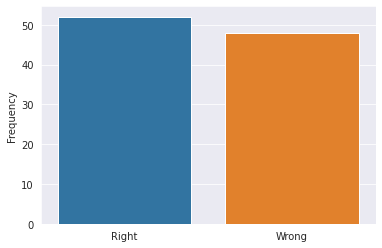

Percentage of valid primary tag :  52.0
Percentage of invalid primary tag :  48.0


In [ ]:
#classifying if a given primary tag is right (valid) or wrong (invalid)

primary_tags_right_wrong = []

#for loop to make the prediction
for i in primary_tags_numb: #for every primary tag
  if i in unique_vendor_tag_numb:  #check if the primary tag is present in the unique vendor tag numb list
    primary_tags_right_wrong.append("Right") #if present, then the primary tag of the corresponding vendor is valid
  else :
    primary_tags_right_wrong.append("Wrong") #if not present, then the primary tag of the corresponding vendor is invalid

primary_tags_right_wrong_count = Counter(primary_tags_right_wrong)

#plotting the frequency of right (valid) and wrong(invalid) primary tag
sns.barplot(x = list(primary_tags_right_wrong_count.keys()) , y = list(primary_tags_right_wrong_count.values()))  
plt.ylabel("Frequency")
plt.show()

#getting the percentage of right(valid) and wrong(invalid) primary tag
valid = list(primary_tags_right_wrong_count.values())[0]
not_valid = list(primary_tags_right_wrong_count.values())[1]

total = valid + not_valid

print("Percentage of valid primary tag : " , np.round(valid/total*100 , 2) )
print("Percentage of invalid primary tag : " , np.round(not_valid/total*100 , 2) )

In [ ]:
#getting the valid primary tag number
valid_primary_tag_numb = []

for i in range(len(primary_tags_numb)):
  if primary_tags_right_wrong[i] == "Right":
    valid_primary_tag_numb.append(primary_tags_numb[i])
    
#getting the corresponding valid primary tag name
valid_primary_tag_names = []
for i in valid_primary_tag_numb:
  valid_primary_tag_names.append(vendor_numb_name[i])

In [ ]:
#given the valid primary tag number and name, group by the unique primary tag name

valid_primary_tag = pd.DataFrame(list(zip(valid_primary_tag_names, valid_primary_tag_numb)),columns =['Tag Name', 'Tag Number'])


valid_primary_tag_group = (valid_primary_tag.groupby(["Tag Name"] , dropna = False , as_index=False).size()).sort_values("size" , ascending = False)
print("Number of unique primary tag names : " , len(valid_primary_tag_group))
valid_primary_tag_group

Number of unique primary tag names :  17


Tag Name  size
10        None    23
4     Desserts     5
5     Fatayers     3
13      Salads     3
7   Milkshakes     3
16  Vegetarian     2
14       Soups     2
11      Pastas     2
15      Steaks     1
12      Pizzas     1
0      Biryani     1
9     Mojitos      1
1    Breakfast     1
6      Kushari     1
3       Crepes     1
2      Chinese     1
8      Mishkak     1

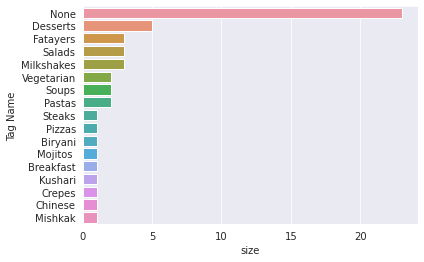

In [ ]:
#plot of the valid unique primary tag name along with its frequency
sns.barplot(x = "size" , y = "Tag Name", data = valid_primary_tag_group )  

> There are 17 unique primary tag name. Desserts top the list with 44 vendors having it as its primary tag

In [ ]:
#Getting the vendor_tag_name
vendors.groupby([ 'vendor_tag_name'], as_index=False).size()

vendor_tag_name  size
0   American,Breakfast,Burgers,Cafe,Desserts,Free ...     7
1   American,Breakfast,Burgers,Desserts,Italian,Sa...     1
2         American,Breakfast,Burgers,Fries,Sandwiches     1
3          American,Breakfast,Rolls,Salads,Sandwiches     1
4   American,Burgers,Desserts,Donuts,Fries,Pasta,S...     1
..                                                ...   ...
72             Italian,Pasta,Pizzas,Salads,Sandwiches     1
73       Omani,Arabic,Shuwa,Pasta,Rice,Soups,Lebanese     1
74  Pizzas,Italian,Breakfast,Soups,Pasta,Salads,De...     1
75               Sandwiches,Breakfast,Burgers,Mojitos     1
76  Sandwiches,Shawarma,Fresh Juices,Mojitos,Milks...     1

[77 rows x 2 columns]

In [ ]:
#getting the unique tag names of all the vendors combined

vendor_tag_names_count = dict(Counter(vendor_tag_names))

vendor_tag_names_count_dict = {"Food" : list(vendor_tag_names_count.keys()) , "Frequency" : list(vendor_tag_names_count.values()) }
vendor_tag_names_count_df = (pd.DataFrame(vendor_tag_names_count_dict)).sort_values("Frequency" , ascending = False)

print("Number of unique tag names : " , len(vendor_tag_names_count_df))
vendor_tag_names_count_df

Number of unique tag names :  69


Food  Frequency
3     Desserts         44
8   Sandwiches         42
2      Burgers         40
7       Salads         33
19    American         27
..         ...        ...
45  Vegetarian          1
44       Thali          1
41       Pizza          1
28   Manakeesh          1
68    Fatayers          1

[69 rows x 2 columns]

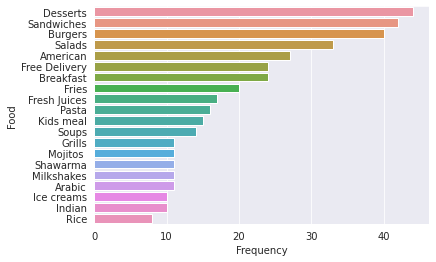

In [ ]:
#plotting the vendors tag names along with its frequency
sns.barplot(x = "Frequency" , y = "Food" , data = vendor_tag_names_count_df[ : 20])  

[(0.0, 50.0)]

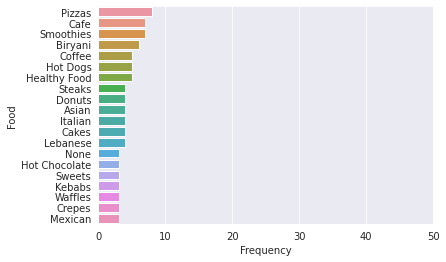

In [ ]:
p1 = sns.barplot(x = "Frequency" , y = "Food" , data = vendor_tag_names_count_df[ 20: 40])  
p1.set(xlim=(0, 50))

[(0.0, 50.0)]

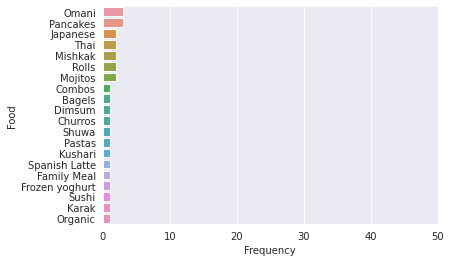

In [ ]:
p2 = sns.barplot(x = "Frequency" , y = "Food" , data = vendor_tag_names_count_df[ 40: 60])  
p2.set(xlim=(0, 50))

[(0.0, 50.0)]

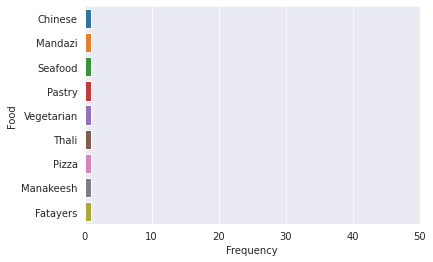

In [ ]:
p3 = sns.barplot(x = "Frequency" , y = "Food" , data = vendor_tag_names_count_df[ 60: ])  
p3.set(xlim=(0, 50))

> There are 69 unqiue tag names among all the vendors. Desserts top the list. Free Delivery is also considered as a tag name for the vendors. Free Delivery comes 6th from the top. 

<font color = red > **Interpretation** </font>

> 1. There were only 17 vendors which had a valid primary key
> 2. There are 69 unique dishes offered by combining all the vendors
> 3. One of the tag name is Free Delievery, with 24 vendors having it as part of their tag. Hence there are 68 dishes
> 4. From delievery_charge, 41 vendors provide free delivery. Hence the 24 vendors who have a tag name of Free Delivery can be checked against the 41 vendors obtained in the delievry_charge feature



##### **one_click_vendor**

In [ ]:
one_click_vendor = vendors.groupby([ 'one_click_vendor'], dropna=False, as_index=False).size()
one_click_vendor

one_click_vendor  size
0                Y   100

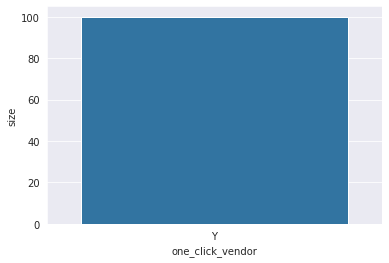

In [ ]:
sns.barplot(x = "one_click_vendor" , y = "size" , data = one_click_vendor)  

<font color = red > **Interpretation** </font>

> 1. All vendors can be accessed at one click



##### **country_id**

In [ ]:
country_id = vendors.groupby([ 'country_id'], dropna=False, as_index=False).size()
country_id

country_id  size
0         1.0   100

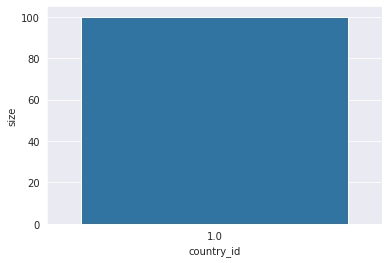

In [ ]:
sns.barplot(x = "country_id" , y = "size" , data = country_id)  

<font color = red > **Interpretation** </font>

> 1. All vendors belong to the same country, Oman



##### **city_id**

In [ ]:
city_id = vendors.groupby([ 'city_id'], dropna=False, as_index=False).size()
city_id

city_id  size
0      1.0   100

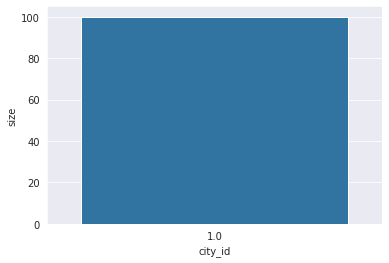

In [ ]:
sns.barplot(x = "city_id" , y = "size" , data = city_id)  

<font color = red > **Interpretation** </font>

> 1. All vendors belong to the same city



##### **created_at**

In [ ]:
vendors_created_at = list(vendors['created_at'])
vendors_created_at_date = [i.split(" ")[0] for i in vendors_created_at]
vendors_created_at_time = [i.split(" ")[1] for i in vendors_created_at]

In [ ]:
vendors_created_at_date_year = [int(i.split("-")[0]) for i in vendors_created_at_date]

vendors_created_at_date_year_dict = Counter(vendors_created_at_date_year)
year = list(vendors_created_at_date_year_dict.keys())
freq = list(vendors_created_at_date_year_dict.values())

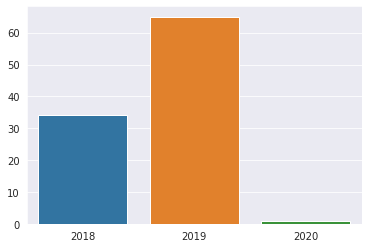

In [ ]:
sns.barplot(x = year , y = freq)

> Majority of the vendors created a account in 2019

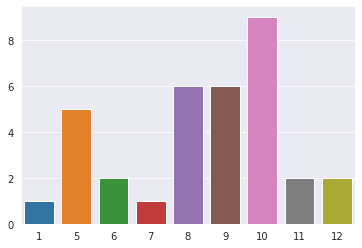

In [ ]:
#analyzing 2018

vendors_created_at_date_2018 = [i.split(" ")[0] for i in vendors_created_at if i.startswith("2018")]
vendors_created_at_time_2018 = [i.split(" ")[1] for i in vendors_created_at if i.startswith("2018")]

vendors_created_at_date_2018_month = [int(i.split("-")[1]) for i in vendors_created_at_date_2018]
vendors_created_at_date_2018_month_dict = Counter(vendors_created_at_date_2018_month)

month_2018 = list(vendors_created_at_date_2018_month_dict.keys())
month_freq_2018 = list(vendors_created_at_date_2018_month_dict.values())

sns.barplot(x = month_2018 , y = month_freq_2018)

> 1. There is a continuous addition of new vendors to the akeed app from the May 2018
> 2. This may also be a reason on why customers data only from May 2018 is available

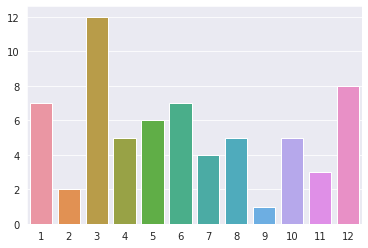

In [ ]:
#analyzing 2019

vendors_created_at_date_2019 = [i.split(" ")[0] for i in vendors_created_at if i.startswith("2019")]
vendors_created_at_time_2019 = [i.split(" ")[1] for i in vendors_created_at if i.startswith("2019")]

vendors_created_at_date_2019_month = [int(i.split("-")[1]) for i in vendors_created_at_date_2019]
vendors_created_at_date_2019_month_dict = Counter(vendors_created_at_date_2019_month)

month_2019 = list(vendors_created_at_date_2019_month_dict.keys())
month_freq_2019 = list(vendors_created_at_date_2019_month_dict.values())

sns.barplot(x = month_2019 , y = month_freq_2019)

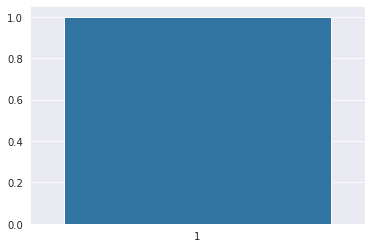

In [ ]:
#analyzing 2020

vendors_created_at_date_2020 = [i.split(" ")[0] for i in vendors_created_at if i.startswith("2020")]
vendors_created_at_time_2020 = [i.split(" ")[1] for i in vendors_created_at if i.startswith("2020")]

vendors_created_at_date_2020_month = [int(i.split("-")[1]) for i in vendors_created_at_date_2020]
vendors_created_at_date_2020_month_dict = Counter(vendors_created_at_date_2020_month)

month_2020 = list(vendors_created_at_date_2020_month_dict.keys())
month_freq_2020 = list(vendors_created_at_date_2020_month_dict.values())

sns.barplot(x = month_2020 , y = month_freq_2020)

<font color = red > **Interpretation** </font>

> 1. Majority of the vendors created an account in the year 2019
> 2. There is no particular trend seen in each year
> 3. In 2018, after January, the next month where new vendors created an account was in May. This may be a reason why customers details only from the month of May 2018 is available



##### **updated_at**

In [ ]:
vendors_updated_at = list(vendors['updated_at'])
vendors_updated_at_date = [i.split(" ")[0] for i in vendors_updated_at]
vendors_updated_at_time = [i.split(" ")[1] for i in vendors_updated_at]

In [ ]:
vendors_updated_at_date_year = [int(i.split("-")[0]) for i in vendors_updated_at]

vendors_updated_at_date_year_dict = Counter(vendors_updated_at_date_year)
year_update = list(vendors_updated_at_date_year_dict.keys())
freq_update = list(vendors_updated_at_date_year_dict.values())

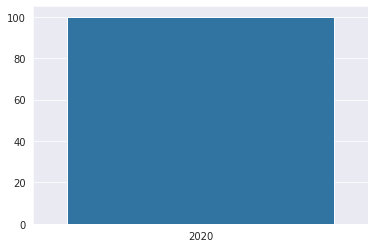

In [ ]:
sns.barplot(x = year_update , y = freq_update)

<font color = red > **Interpretation** </font>

> 1. All the vendors updated their account in 2020



##### **device_type**

In [ ]:
device_type = vendors.groupby([ 'device_type'], dropna=False, as_index=False).size()
device_type

device_type  size
0            1     1
1            3    99

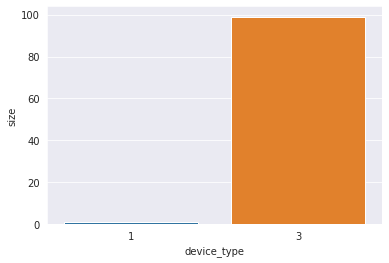

In [ ]:
sns.barplot(x = "device_type" , y = "size" , data = device_type)

In [ ]:
#device type based on vendor type
device_type_cat_en = vendors.groupby([ 'vendor_category_en','device_type'], dropna=False, as_index=False).size()
device_type_cat_en

vendor_category_en  device_type  size
0        Restaurants            3    88
1     Sweets & Bakes            1     1
2     Sweets & Bakes            3    11

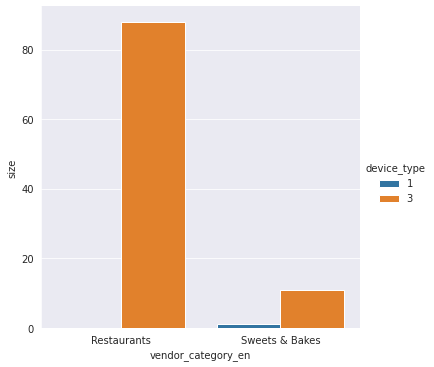

In [ ]:
sns.catplot(x='vendor_category_en', y='size', hue='device_type', data=device_type_cat_en, kind='bar')

<font color = red > **Interpretation** </font>

> 1. Out of the 99 vendors who use device type = 3 , 88 vendors are Restuarants and 11 vendors are Sweet&Bakes



##### **display_orders**

In [ ]:
display_orders = vendors.groupby([ 'display_orders'], dropna=False, as_index=False).size()
display_orders

display_orders  size
0               1   100

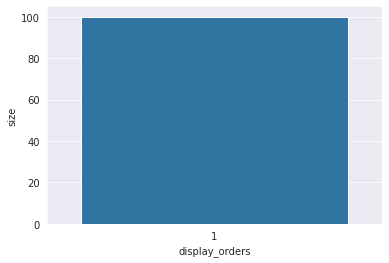

In [ ]:
sns.barplot(x = "display_orders" , y = "size" , data = display_orders)

<font color = red > **Interpretation** </font>

> 1. For all vendors, the order is displayed to them


#### <font color = green >orders</font>

In [ ]:
orders.head(2)

akeed_order_id customer_id  ...  LOCATION_TYPE  CID X LOC_NUM X VENDOR
0        163238.0     92PEE24  ...            NaN       92PEE24 X 0 X 105
1        163240.0     QS68UD8  ...           Work       QS68UD8 X 0 X 294

[2 rows x 26 columns]

In [ ]:
print("Shape of the train customer dataset : " , orders.shape)

Shape of the train customer dataset :  (135303, 26)


In [ ]:
print("Null value present ? \n\n " , orders.isnull().sum())

Null value present ? 

  akeed_order_id                        70
customer_id                            0
item_count                          6925
grand_total                            0
payment_mode                           0
promo_code                        130998
vendor_discount_amount                 0
promo_code_discount_percentage     69423
is_favorite                        35195
is_rated                               0
vendor_rating                      90083
driver_rating                          0
deliverydistance                       0
preparationtime                    55560
delivery_time                     130180
order_accepted_time                48348
driver_accepted_time               88845
ready_for_pickup_time              51054
picked_up_time                     51438
delivered_time                     49562
delivery_date                      99759
vendor_id                              0
created_at                             0
LOCATION_NUMBER                 

> akeed_order_id , item_count , promo_code , promo_code_discount_percentage  <br> , is_favorite , vendor_rating , preparationtime , delivery_time , order_accepted_time , 
<br> driver_accepted_time , read_for_pickup_time , picked_up_time , delievered_time , delievery_time , 
<br> location_type 
<br> have missing/null values

##### <font color = purple > Understanding each column/feature of the dataset </font>

In [ ]:
orders.duplicated().any()

False


##### **customer_id**

In [ ]:
customer_id = (orders.groupby([ 'customer_id'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
customer_id.columns = ['customer_id' , 'number_of_orders']
print("Number of customers that have ordered food : " , len(customer_id))
customer_id

Number of customers that have ordered food :  27445


customer_id  number_of_orders
25804     XW90EAP               262
22564     TL7Z2DM               151
23909     VDEJEMP               146
13319     HJFTTGW               128
8431      B28LJKM               119
...           ...               ...
13486     HRBMGRJ                 1
13487     HRCVHZO                 1
13489     HROTEYJ                 1
13490     HRPUOKP                 1
27444     ZZYY4EX                 1

[27445 rows x 2 columns]

In [ ]:
#descriptive statistics of the number of orders made by the customer
customer_id['number_of_orders'].describe()

count    27445.000000
mean         4.929969
std          7.621525
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        262.000000
Name: number_of_orders, dtype: float64

In [ ]:
px.box(customer_id, y="number_of_orders")

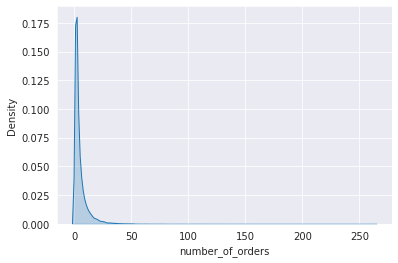

In [ ]:
sns.kdeplot(customer_id['number_of_orders'], shade=True)

<font color = red > **Interpretation** </font>

> 1. 27445 customers have placed an order out of around 35K customers
> 2. 50% of the customers have made 2 orders
> 3. 75% of customers have made 5 orders



##### **item_count**

In [ ]:
item_count = (orders.groupby([ 'item_count'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
item_count

item_count   size
1          2.0  41921
0          1.0  40951
2          3.0  23349
3          4.0  11084
35         NaN   6925
4          5.0   5280
5          6.0   2660
6          7.0   1333
7          8.0    716
8          9.0    370
9         10.0    268
10        11.0    151
11        12.0     99
12        13.0     57
13        14.0     33
14        15.0     19
16        17.0     19
15        16.0     18
19        20.0     11
17        18.0      7
18        19.0      6
21        22.0      4
23        25.0      3
20        21.0      3
25        27.0      2
26        28.0      2
27        30.0      2
32        41.0      2
22        24.0      1
24        26.0      1
28        33.0      1
29        34.0      1
30        38.0      1
31        40.0      1
33        47.0      1
34        68.0      1

In [ ]:
orders["item_count"].describe()

count    128378.000000
mean          2.405404
std           1.645332
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          68.000000
Name: item_count, dtype: float64

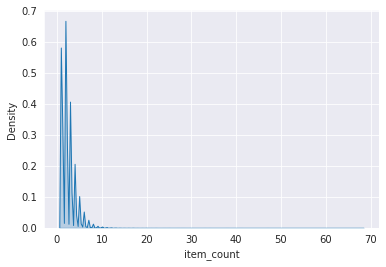

In [ ]:
sns.kdeplot(orders["item_count"], shade=True)

In [ ]:
px.histogram(orders, x="item_count")

<font color = red > **Interpretation** </font>

> 1. Around 41K orders of the customers had 2 items in the order (50% of the orders)
> 2. 75% of customers have made an order of 3 times
> 2. 6925 orders do not have the number of items ordered



##### **grand_total**

In [ ]:
grand_total = (orders.groupby([ 'grand_total'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
grand_total

grand_total  size
94            9.5  2741
100          10.1  2726
83            8.4  2697
67            6.8  2662
89            9.0  2522
...           ...   ...
851          93.2     1
854          94.3     1
858          95.1     1
860          95.3     1
1047        783.8     1

[1048 rows x 2 columns]

In [ ]:
orders["grand_total"].describe()

count    135303.000000
mean         15.374513
std          12.556177
min           0.000000
25%           8.200000
50%          11.700000
75%          18.500000
max         783.800000
Name: grand_total, dtype: float64

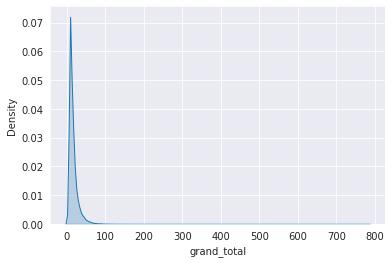

In [ ]:
sns.kdeplot(orders["grand_total"], shade=True)

In [ ]:
px.histogram(orders, x="grand_total")

> 1. On an average a customer spends 15 Omani Radi
> 2. 50% of customers spends 11.7 Omani Radi
> 3. There are no missing values

In [ ]:
#checking if there is a relationship between item_count and grand_total

total_item_cost = orders[['item_count' , 'grand_total']]
total_item_cost.head()

item_count  grand_total
0         1.0          7.6
1         1.0          8.7
2         2.0         14.4
3         1.0          7.1
4         4.0         27.2

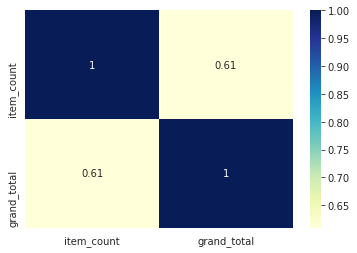

In [ ]:
sns.heatmap(total_item_cost.corr(), cmap="YlGnBu", annot=True)

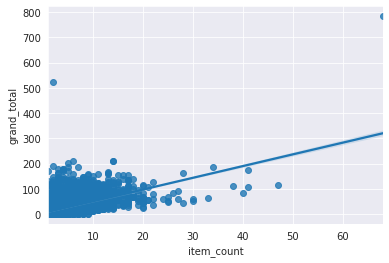

In [ ]:
sns.regplot(x = "item_count",y = "grand_total", data = total_item_cost)

[(0.0, 30.0)]

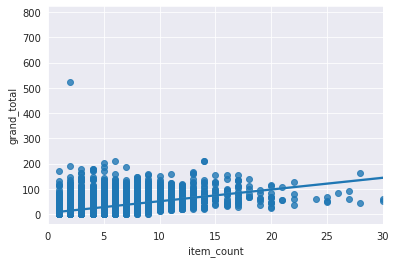

In [ ]:
rp = sns.regplot(x = "item_count",y = "grand_total", data = total_item_cost)
rp.set(xlim = (0,30))

> 1. The correlation between item_count and grand_total is 0.61
> 2. The coefficient of determination is 0.3721
> 3. From correlation value, we can infer that there the strength of the relationship between item_count and grand_total is not very strong and from coefficient of determination, only 37% of the change in grand_total can be explained by number of items (item_count)

<font color = red > **Interpretation** </font>

> 1. 50% of the customers pay 11.7 Omani Radi
> 2. There is some degree of depedency between item_count and grand_total with 37% of the variance in one variable that is explainable by the other variable



##### **payment_mode**

In [ ]:
payment_mode = (orders.groupby([ 'payment_mode'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
payment_mode

payment_mode    size
0             1  104714
1             2   22079
3             4    6696
2             3    1361
4             5     453

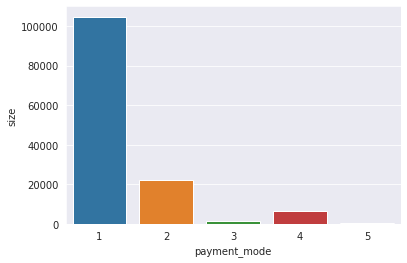

In [ ]:
sns.barplot(x = "payment_mode" , y = "size" , data = payment_mode)

<font color = red > **Interpretation** </font>

> 1. There are 5 modes to make the payment 
> 2. Payment mode is used the most, followed by payment mode 2,4,3 and 5



##### **promo_code**

In [ ]:
promo_code = (orders.groupby([ 'promo_code'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
promo_code

promo_code    size
1396           NaN  130998
1307  freedelivery     469
783        FDakeed     326
1301    eidmubarak     232
942        OrderFD     162
...            ...     ...
521     Akeed30220       1
520     Akeed30200       1
519    Akeed301067       1
518    Akeed300700       1
698        Akeedmm       1

[1397 rows x 2 columns]

> 1. There are many promo codes
> 2. Free Delivery is the highest used promo code


Percenatge of NaN promo code :  96.82
Percenatge of valid promo code :  3.18


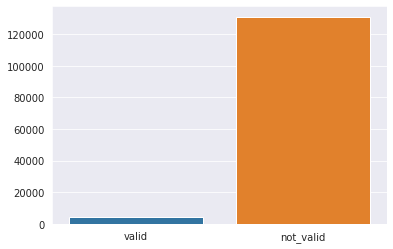

In [ ]:
#Let's see the percentage of valid promo code and invalid(missing/null) promo codes

promo_nan = orders["promo_code"].isnull().sum()
promo_valid = orders.shape[0] - promo_nan
promo_name = ["valid" , "not_valid"]
sns.barplot(x = promo_name , y = [promo_valid , promo_nan])

print("Percenatge of NaN promo code : " , np.round(promo_nan/orders.shape[0]*100 , 2))
print("Percenatge of valid promo code : " , np.round(promo_valid/orders.shape[0]*100 , 2))

<font color = red > **Interpretation** </font>

> 1. Even though, Free Delivery tops the list of valid promo codes, it only contributes to 3.18% of the valid promo code
> 2. 96.82% of customers, do not use any promo code or 96.82% of the orders do not have a promo code option



##### **vendor_discount_amount**

In [ ]:
vendor_discount_amount = (orders.groupby([ 'vendor_discount_amount'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
vendor_discount_amount

vendor_discount_amount    size
0                    0.000  135106
3                    0.150      11
16                   0.375      11
11                   0.300       9
10                   0.255       8
..                     ...     ...
53                   1.035       1
6                    0.195       1
55                   1.065       1
56                   1.080       1
77                  10.650       1

[78 rows x 2 columns]

Percenatge of zero discount  :  99.85
Percenatge of non zero discount:  0.15


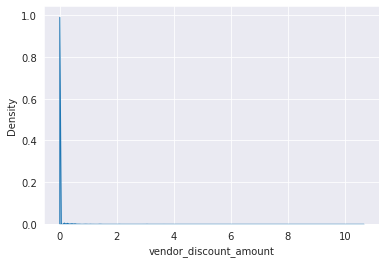

In [ ]:
sns.kdeplot(orders["vendor_discount_amount"], shade=True)
print("Percenatge of zero discount  : " , np.round(135106/orders.shape[0]*100 , 2))
print("Percenatge of non zero discount: " , np.round(np.subtract(orders.shape[0] , 135106 )/orders.shape[0]*100 , 2))

<font color = red > **Interpretation** </font>

> 1. For less than < 1% of the orders, the vendors provide a discount



##### **promo_code_discount_percentage**

In [ ]:
promo_code_discount_percentage = (orders.groupby([ 'promo_code_discount_percentage'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
promo_code_discount_percentage.at[4 , "promo_code_discount_percentage"] = -1
promo_code_discount_percentage

promo_code_discount_percentage   size
4                            -1.0  69423
0                             0.0  65809
3                            25.0     69
1                            10.0      1
2                            20.0      1

Percenatge of NaN  discount percenatge   :  51.31
Percenatge of zero discount percenatge  48.64
Percenatge of non zero discount percenatge  0.05


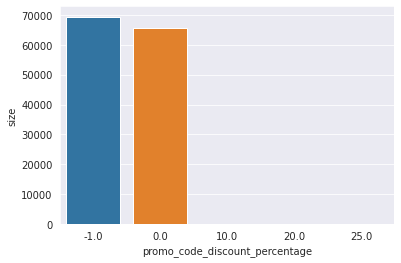

In [ ]:
sns.barplot(x = "promo_code_discount_percentage" , y = "size" , data = promo_code_discount_percentage)
print("Percenatge of NaN  discount percenatge   : " , np.round(69423/orders.shape[0]*100 , 2))
print("Percenatge of zero discount percenatge " , np.round(65809/orders.shape[0]*100 , 2))
print("Percenatge of non zero discount percenatge " , np.round(np.subtract(orders.shape[0] , 69423+65809 )/orders.shape[0]*100 , 2))

<font color = red > **Interpretation** </font>

> 1. The percantage of NaN discount percentage is 51% and zero discount percentage is 47%. This is roughly 99% percenatge. 
> 2. Only 0.05% have a non zero discount percenatge
> 3. These values are very close to the vendor_discount_amount




##### **is_favorite**

In [ ]:
is_favorite = (orders.groupby([ 'is_favorite'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
is_favorite.at[2 , "is_favorite"] = "NaN"
is_favorite

is_favorite   size
0          No  98449
2         NaN  35195
1         Yes   1659

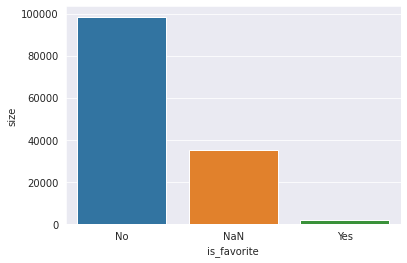

In [ ]:
sns.barplot(x = "is_favorite" , y = "size" , data = is_favorite)

<font color = red > **Interpretation** </font>

> 1. There is only a very small percenatge of customers(orders) who finds a vendor that they really like
> 2. Majority of the cutsomers (orders) do not have a favourite vendor




##### **is_rated**

In [ ]:
is_rated = (orders.groupby([ 'is_rated'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
is_rated

is_rated    size
0       No  115194
1      Yes   20109

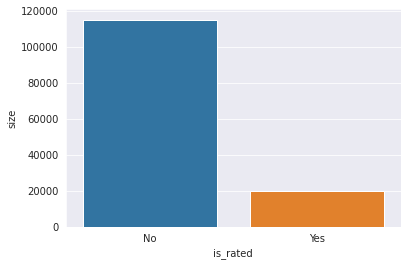

In [ ]:
sns.barplot(x = "is_rated" , y = "size" , data = is_rated)

<font color = red > **Interpretation** </font>

> 1. Majority of the customers (orders) have not rated the vendor



##### **vendor_rating**

In [ ]:
vendor_rating = (orders.groupby([ 'vendor_rating'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
vendor_rating.at[6 , "vendor_rating"] = -1
vendor_rating

vendor_rating   size
6           -1.0  90083
0            0.0  25175
5            5.0  14212
4            4.0   2748
3            3.0   1426
1            1.0   1029
2            2.0    630

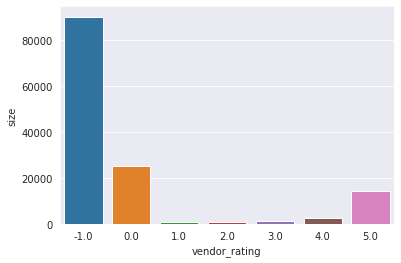

In [ ]:
sns.barplot(x = "vendor_rating" , y = "size" , data = vendor_rating)

<font color = red > **Interpretation** </font>

> 1. Majority of the customers (orders) have not given a rating to the vendor. This is followed by a rating of 0 for the vendors and then a rating of 5



##### **driver_rating**

In [ ]:
driver_rating = (orders.groupby([ 'driver_rating'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
driver_rating

driver_rating    size
0            0.0  115420
5            5.0   15735
4            4.0    2142
3            3.0     889
1            1.0     765
2            2.0     352

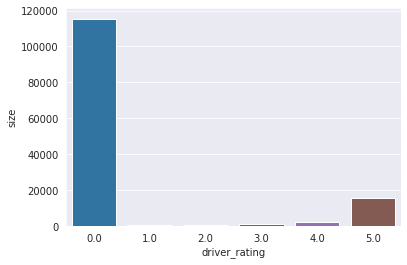

In [ ]:
sns.barplot(x = "driver_rating" , y = "size" , data = driver_rating)

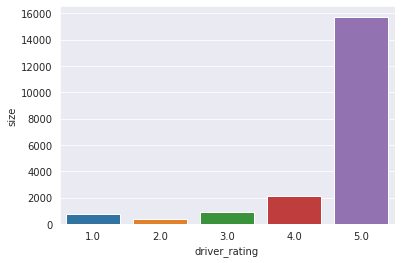

In [ ]:
#drivier rating after removing 0 rating

sns.barplot(x = "driver_rating" , y = "size" , data = driver_rating[1:])

<font color = red > **Interpretation** </font>

> Majority of the customers have given a drive rating of 0. This is followed by a 5 star rating



##### **deliverydistance**

In [ ]:
deliverydistance = (orders.groupby([ 'deliverydistance'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
deliverydistance.head()

deliverydistance   size
0                0.00  55613
916              9.16    188
923              9.23    164
961              9.61    162
917              9.17    159

In [ ]:
#getting the last few rows
#to determine how many orders have been made where distnace is >15km 
#Why 15km? - From the previous analysis, we know that majority of the vendors offers a maximum delivery distnace of 15km
deliverydistance.tail(25)

deliverydistance  size
22                0.22     5
8                 0.08     5
1                 0.01     4
74                0.74     4
3                 0.03     3
1502             15.12     3
5                 0.05     3
12                0.12     3
7                 0.07     3
1503             15.41     2
1500             15.00     2
24                0.24     2
17                0.17     1
1501             15.11     1
10                0.10     1
6                 0.06     1
1504             15.48     1
1505             16.26     1
1506             16.64     1
1507             16.77     1
1508             16.94     1
1509             17.20     1
1510             19.29     1
1511             19.36     1
1512             19.81     1

In [ ]:
orders['deliverydistance'].describe()

count    135303.000000
mean          4.104255
std           4.361884
min           0.000000
25%           0.000000
50%           2.900000
75%           7.920000
max          19.810000
Name: deliverydistance, dtype: float64

In [ ]:
px.histogram(orders, x="deliverydistance")

<font color = red > **Interpretation** </font>

> Majority of the orders are made within 0km from the vendor.
> <br> There are very few orders made, where the distance between the customer and vendor is greater than 15km



##### **preparationtime**

In [ ]:
preparationtime = (orders.groupby([ 'preparationtime'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
preparationtime.at[14, 'preparationtime'] = -1
preparationtime

preparationtime   size
14             -1.0  55560
4              45.0  23692
3              40.0  19865
2              35.0  13801
5              50.0  11901
6              55.0   4065
1              30.0   3617
7              60.0   1815
8              65.0    683
9              70.0    161
0              25.0     60
10             75.0     51
11             80.0     19
12             85.0     10
13             90.0      3

In [ ]:
orders['preparationtime'].describe()

count    79743.000000
mean        43.181721
std          7.107582
min         25.000000
25%         40.000000
50%         45.000000
75%         45.000000
max         90.000000
Name: preparationtime, dtype: float64

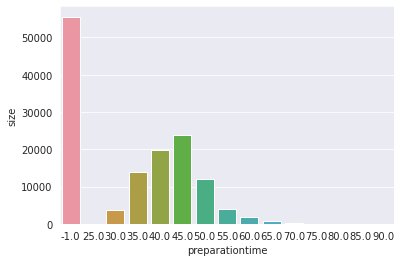

In [ ]:
sns.barplot(x = "preparationtime" , y = "size" , data = preparationtime)

<font color = red > **Interpretation** </font>

> Excluding the missing prepration time (time =-1), most of the orders take 45 minutes with a mximum time of 90 minutes




##### **ready_for_pickup_time  , picked_up_time ,   delivered_time**            

In [ ]:
pickup_dielvery_time = orders[['ready_for_pickup_time' , 'picked_up_time' , 'delivered_time']]
print("Shape : " , pickup_dielvery_time.shape )

#The last few rows are displayed as the first few rows have Nan values
pickup_dielvery_time.tail()

Shape :  (135303, 3)


ready_for_pickup_time       picked_up_time       delivered_time
135298   2020-03-01 00:02:10  2020-03-01 00:22:53  2020-03-01 00:29:42
135299   2020-03-01 00:20:05  2020-03-01 00:27:50  2020-03-01 01:03:14
135300   2020-03-01 00:10:34  2020-03-01 00:14:43  2020-03-01 00:36:37
135301   2020-03-01 00:08:10  2020-03-01 00:22:11  2020-03-01 00:36:52
135302   2020-03-01 00:14:12  2020-03-01 00:21:33  2020-03-01 00:28:06

In [ ]:
#getting rows which do not have Nan values either in ready_for_pickup_time , picked_up_time and deliveerd_time

pickup_dielvery_time_no_nan = pickup_dielvery_time.dropna()
print("Shape after removing NaN values : " , pickup_dielvery_time_no_nan.shape)
pickup_dielvery_time_no_nan.head()

Shape after removing NaN values :  (83330, 3)


ready_for_pickup_time       picked_up_time       delivered_time
39168   2019-10-02 06:07:01  2019-10-02 10:12:51  2019-10-02 10:46:19
39169   2019-10-02 06:13:38  2019-10-02 10:18:13  2019-10-02 10:52:28
39170   2019-10-02 06:32:24  2019-10-02 10:33:07  2019-10-02 10:49:46
39171   2019-10-02 06:32:22  2019-10-02 10:32:59  2019-10-02 10:45:35
39173   2019-10-02 06:59:00  2019-10-02 11:01:22  2019-10-02 11:34:12

In [ ]:
#getting the time of ready_for_pickup_time , picked_up_time and deliveerd_time

#dictionary to store the time values
time = {"read_for_pickup_time" : [] , "picked_up_time" : [] , "delivered_time" : []}

#ready_for_pickup_time
t = pickup_dielvery_time_no_nan['ready_for_pickup_time'].str.split(" " , expand = True)
t.columns = ["Date" , "Time"]
time["read_for_pickup_time"] = list(t['Time'])

#picked_up_time
t = pickup_dielvery_time_no_nan['picked_up_time'].str.split(" " , expand = True)
t.columns = ["Date" , "Time"]
time["picked_up_time"] = list(t['Time'])

#delivered time
t = pickup_dielvery_time_no_nan['delivered_time'].str.split(" " , expand = True)
t.columns = ["Date" , "Time"]
time["delivered_time"] = list(t['Time'])


#displaying dataframe
time_df = pd.DataFrame(time)
time_df.head()

read_for_pickup_time picked_up_time delivered_time
0             06:07:01       10:12:51       10:46:19
1             06:13:38       10:18:13       10:52:28
2             06:32:24       10:33:07       10:49:46
3             06:32:22       10:32:59       10:45:35
4             06:59:00       11:01:22       11:34:12

In [ ]:
#converting hh:mm:ss to seconds

time_df['read_for_pickup_time'] = time_df['read_for_pickup_time'].apply(convert_to_sec)
time_df['picked_up_time'] = time_df['picked_up_time'].apply(convert_to_sec)
time_df['delivered_time'] = time_df['delivered_time'].apply(convert_to_sec)

In [ ]:
time_df.head()

read_for_pickup_time  picked_up_time  delivered_time
0               22021.0         36771.0         38779.0
1               22418.0         37093.0         39148.0
2               23544.0         37987.0         38986.0
3               23542.0         37979.0         38735.0
4               25140.0         39682.0         41652.0

In [ ]:
#computing the difference in time between the different events events

#absolute difference is taken, as the delieverd time/picked up time can be early morning of the next day. 
#This will result in a negative value
time_df['pickup_difference'] = np.abs(time_df['picked_up_time'] - time_df['read_for_pickup_time'])
time_df['delivered_difference'] = np.abs(time_df['delivered_time'] - time_df['picked_up_time'])
time_df['total_difference'] = np.abs(time_df['delivered_time'] - time_df['read_for_pickup_time'])

time_df.head()

read_for_pickup_time  picked_up_time  ...  delivered_difference  total_difference
0               22021.0         36771.0  ...                2008.0           16758.0
1               22418.0         37093.0  ...                2055.0           16730.0
2               23544.0         37987.0  ...                 999.0           15442.0
3               23542.0         37979.0  ...                 756.0           15193.0
4               25140.0         39682.0  ...                1970.0           16512.0

[5 rows x 6 columns]

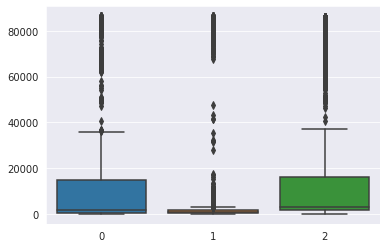

In [ ]:
#plotting the difference in time calculated
# 0 -  time difference between ready for pickup and picked up time
# 1 - time difference between delieverd time and pickup up time
# 2 - time difference between ready for pick up and delieverd time 
data = [time_df['pickup_difference'] , time_df['delivered_difference'] , time_df['total_difference'] ]
sns.boxplot(data=data)

<font color = red > **Interpretation** </font>

> Once the item/food is picked up for delievry not much time is taken for delivery, but the waiting time range for the item to be picked up is large. This accounts for the overall huge time range between ready for pickup and delievered time




##### **delivery_date**            

In [ ]:
#given a date, getting the day of the week

date = pd.DataFrame({'Date':list(orders["delivery_date"])})
date['Date'] = pd.to_datetime(date['Date'])
date['day'] = date['Date'].dt.day_name()
  
#counting the number of orders delivered per day
day = list(date['day'])
day_count = Counter(day)

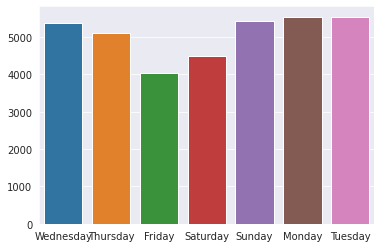

In [ ]:
sns.barplot(x = list(day_count.keys()) , y = list(day_count.values()))

<font color = red > **Interpretation** </font>

> The day that has the minimum orders delieverd is on Friday and Saturday. This maybe due to the late openings of the vendors on Friday and Saturday


##### **vendor_id**            

In [ ]:
vendor_id = (orders.groupby([ 'vendor_id'], dropna=False, as_index=False).size()).sort_values("size" ,  ascending = False)
print("Number of vendors : " , len(vendor_id))
vendor_id

Number of vendors :  100


vendor_id  size
27        113  7807
24        105  5562
14         79  5117
18         84  5001
13         78  4643
..        ...   ...
71        304   562
61        271   559
46        196   512
58        250   503
66        295   474

[100 rows x 2 columns]

> All the 100 vendors have taken orders from customers

In [ ]:
orders_vendor_id_rating = orders[['vendor_id' , 'vendor_rating']]

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

rating_mean = (orders_vendor_id_rating .groupby('vendor_id').agg({'vendor_rating': ['mean','median']})).sort_values("vendor_id")
print("Vendors are sorted in ascending order of vendor's id")
print("\n\nRating value of vendors : 1st 20 vendors")
print(rating_mean[: 20])
print("\n\nRating value of vendors : last 10 vendors")
print(rating_mean[: 20])

Vendors are sorted in ascending order of vendor's id


Rating value of vendors : 1st 20 vendors
          vendor_rating       
                   mean median
vendor_id                     
4              1.751085    0.0
13             2.125490    0.0
20             1.859794    0.0
23             2.111111    0.0
28             1.647351    0.0
33             1.827440    0.0
43             1.135678    0.0
44             1.653680    0.0
55             1.276712    0.0
66             0.738636    0.0
67             2.368852    2.0
75             1.404255    0.0
76             2.407767    2.0
78             0.444444    0.0
79             2.252604    0.0
81             0.746341    0.0
82             2.503205    3.0
83             0.457816    0.0
84             2.011899    0.0
85             0.581081    0.0


Rating value of vendors : last 10 vendors
          vendor_rating       
                   mean median
vendor_id                     
4              1.751085    0.0
13             2.125490

In [ ]:
#getting the vendors rating from vendors dataset

vendor_id_rating = vendors[['id' , 'vendor_rating']]
vendor_id_rating.sort_values("vendor_rating" , ascending = False)
vendor_id_rating.columns = ['vendor_id' , 'vendor_rating']

print("Vendors are sorted in ascending order of vendor's id")
print("\n\nRating value of vendors : 1st 20 vendors")
print(vendor_id_rating[: 20])
print("\n\nRating value of vendors : last 10 vendors")
print(vendor_id_rating[: 20])

Vendors are sorted in ascending order of vendor's id


Rating value of vendors : 1st 20 vendors
    vendor_id  vendor_rating
0           4            4.4
1          13            4.7
2          20            4.5
3          23            4.5
4          28            4.4
5          33            4.6
6          43            4.3
7          44            4.3
8          55            4.5
9          66            4.0
10         67            4.3
11         75            4.6
12         76            4.6
13         78            4.4
14         79            4.7
15         81            3.8
16         82            4.4
17         83            4.2
18         84            4.3
19         85            4.6


Rating value of vendors : last 10 vendors
    vendor_id  vendor_rating
0           4            4.4
1          13            4.7
2          20            4.5
3          23            4.5
4          28            4.4
5          33            4.6
6          43            4.3
7          44      

<font color = red > **Interpretation** </font>

> 1. Food has been ordered from all the 100 vendors
> 2 From the above tables, after examining the rating values of each of the vendors from vendors and orders table, it can be seen that there is a difference in the ratings provided by the two dataset.
 * The above tables have sorted based on vendor id. As the vendor id increases, the difference between the vendor rating values provided by vendors and order dataset decreases
> 3. The customers have not been grouped by location number, as we know from previous analaysis, location_numbers do not form defined clusters




##### **created_at**            

In [ ]:
#The created_at column corresponds to the vendors or customers?
#As this is not mentioned, Let's group the orders dataset with vendors_id and created_at
#If we get exactly 100 rows, this implies that created_at is for the vendors
#else it is of the customers

created_at_vendor_customer = orders.groupby([ 'vendor_id' , 'created_at'], dropna=False, as_index=False).size().sort_values("size" ,  ascending = False)
print("Number of rows : " , len(created_at_vendor_customer))
created_at_vendor_customer.head()

Number of rows :  135243


vendor_id           created_at  size
19113         78  2019-10-10 21:23:03     2
17260         78  2019-07-30 19:02:59     2
31367         84  2019-11-14 21:47:18     2
27726         83  2019-07-17 04:00:38     2
59669        113  2019-12-20 14:38:13     2

> created_at corresponds to customers

In [ ]:
#getting the date and time of account creation

orders_created_at = list(orders['created_at'])
orders_created_at_date = [i.split(" ")[0] for i in orders_created_at]
orders_created_at_time = [i.split(" ")[1] for i in orders_created_at]

Text(0, 0.5, 'Frequency')

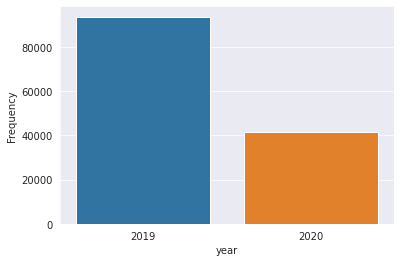

In [ ]:
#getting the year from the date of account creation

orders_created_at_date_year = [int(i.split("-")[0]) for i in orders_created_at_date]

orders_created_at_date_year_dict = Counter(orders_created_at_date_year)
year = list(orders_created_at_date_year_dict.keys())
freq = list(orders_created_at_date_year_dict.values())

#plotting the number of orders per year
sns.barplot(x = year , y = freq)
plt.xlabel("year")
plt.ylabel("Frequency")

<font color = red > **Interpretation** </font>
> 1. The order details of customers in 2018 is not available
> 2. A low number of orders in 2020 maybe becuase the customer information of the first three months are only available (train customer dataset)



##### **LOCATION_NUMBER**

Unique location numbers :  24


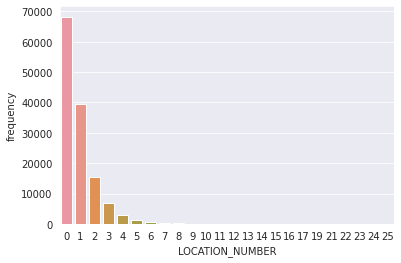

In [ ]:
orders_loc_num = orders.groupby([ 'LOCATION_NUMBER'], dropna=False, as_index=False).size()
orders_loc_num.columns = ['LOCATION_NUMBER' , "frequency"]
print("Unique location numbers : " , len(orders_loc_num))
sns.barplot(x = 'LOCATION_NUMBER' , y = "frequency" , data = orders_loc_num)

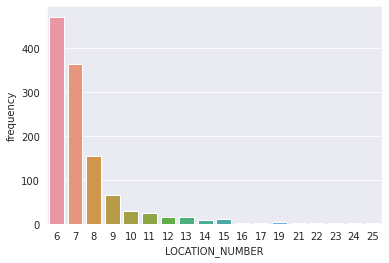

In [ ]:
#zooming into the above plot
sns.barplot(x = 'LOCATION_NUMBER' , y = "frequency" , data = orders_loc_num[6:])

In [ ]:
print("Location numbers from where no orders are made : " , set([i for i in range(30)]) - set(orders_loc_num['LOCATION_NUMBER']))

Location numbers from where no orders are made :  {18, 20, 26, 27, 28, 29}


<font color = red > **Interpretation** </font>
> 1. Orders have been made from 24 location numbers
> 2. There are no orders made from location numbers : 18,20,26,27,28 and 29
> 3. Majority of the orders are made from location number 0. This maybe due to the fact that a huge number of customers belong to location number 0



##### **Location_type**

  LOCATION_TYPE  frequency
0          Home      51484
3           NaN      48893
2          Work      18257
1         Other      16669


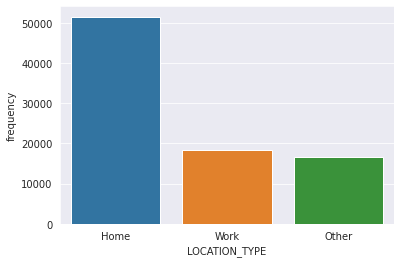

In [ ]:
orders_loc_type = orders.groupby([ 'LOCATION_TYPE'], dropna=False, as_index=False).size().sort_values("size" , ascending = False)
orders_loc_type.columns = ['LOCATION_TYPE' , 'frequency']


sns.barplot(x = 'LOCATION_TYPE' , y = "frequency" , data = orders_loc_type)

print(orders_loc_type)

<font color = red > **Interpretation** </font>
>Majority of the orders are made from Home, followed by work and others respectively



##### **Location_type**

In [ ]:
cid_loc_num_vend = orders.groupby([ 'CID X LOC_NUM X VENDOR'], dropna=False, as_index=False).size().sort_values("size" , ascending = False)
print("Number of CID X LOC_NUM X VENDOR :  ", len(cid_loc_num_vend))

Number of CID X LOC_NUM X VENDOR :   80142


<font color = red > **Interpretation** </font>
> There are 80142 unique customer, location number and vendor combination

### <font color = blue > Merging the Datasets </font>
> 1. Merge customer train and customer location with customer id 
> 2. For each customer , merge each vendor details (vendors dataset)
> 3. For each customer - vendor combination, combine the corresponding order detail (from orders dataset)
> 4. For a given customer - vendor , if order detail is present, then target varibale = 1, else target variable = 0